# Libraries importing 

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter
from sys import getsizeof
from matplotlib.colors import rgb2hex, Normalize;
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, StandardScaler;
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_validate;
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge;
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR;
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, r2_score;
from scipy.stats import kurtosis, skew;
from ipywidgets import widgets, interact
from cycler import cycler
rcParams['axes.prop_cycle'] = cycler(
                                color=['navy','orange','k','b',
                                       'y','pink', 'magenta','cyan',
                                       'r','midnightblue',]
                                    )




### Overview of Solar Power Plants
A solar power plant consists of multiple solar panels that convert sunlight into electricity. This electricity is then collected and converted into a usable form by inverters. Additionally, various sensors are placed around the plant to monitor environmental conditions and the performance of the solar panels.

### Data Collection in Solar Power Plants
1. **Power Generation Data:**

**Inverter Level:** The power generation data is collected from the inverters. Each inverter is connected to multiple lines of solar panels. This data provides information on how much electricity each inverter is generating.

**Inverters:** Devices that convert the direct current (DC) produced by the solar panels into alternating current (AC), which can be used by the electrical grid.

2. **Sensor Readings Data:**

**Plant Level:** The sensor data is collected from a set of sensors optimally placed around the plant. These sensors monitor various environmental conditions and other factors that could affect the performance of the solar panels, such as temperature, sunlight intensity, and wind speed.

**Single Array of Sensors:** A strategically positioned set of sensors designed to provide comprehensive data about the plant's conditions.

## Data Files
two pairs of files for two different solar power plants over a period of 34 days:

1. **Power Generation Dataset:** Contains data on the electricity generated by each inverter in the solar power plant.

2. **Sensor Readings Dataset:** Contains data from the sensors monitoring the environmental conditions at the plant.


This data is crucial for analyzing and improving the performance and efficiency of solar power plants.


[Dataset Link](https://www.kaggle.com/datasets/anikannal/solar-power-generation-data)


# Data Exploration preparation and insights

### Plant 1 Power production data exploration

In [2]:
prod_p1 = pd.read_csv("F:\\UNI courses\\semester 2 year 3\\optimization techniques\\project\\Plant_1_Generation_Data.csv")
prod_p1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [3]:
prod_p1.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

**how many PLANT_ID items are there ?**

**What is the format of the date_time column ?**

**how many "SOURCE_KEY" items are there?** 

the source key represents unique identifiers for each power generation unit (e.g., inverters) within the dataset. These identifiers are crucial for distinguishing between the different sources of power generation data.

In [4]:
print("'PLANT_ID' unique values: ",np.unique(prod_p1['PLANT_ID'].values[0]))
print("'DATE_TIME' data type: ", type(prod_p1['DATE_TIME'][0]))
SOURCE_KEY = np.unique(prod_p1['SOURCE_KEY'].values)
print("Total 'SOURCE_KEY': ",len(SOURCE_KEY))
print("'SOURCE_KEY' values: ",SOURCE_KEY)

'PLANT_ID' unique values:  [4135001]
'DATE_TIME' data type:  <class 'str'>
Total 'SOURCE_KEY':  22
'SOURCE_KEY' values:  ['1BY6WEcLGh8j5v7' '1IF53ai7Xc0U56Y' '3PZuoBAID5Wc2HD' '7JYdWkrLSPkdwr4'
 'McdE0feGgRqW7Ca' 'VHMLBKoKgIrUVDU' 'WRmjgnKYAwPKWDb' 'YxYtjZvoooNbGkE'
 'ZnxXDlPa8U1GXgE' 'ZoEaEvLYb1n2sOq' 'adLQvlD726eNBSB' 'bvBOhCH3iADSZry'
 'iCRJl6heRkivqQ3' 'ih0vzX44oOqAx2f' 'pkci93gMrogZuBj' 'rGa61gmuvPhdLxV'
 'sjndEbLyjtCKgGv' 'uHbuxQJl8lW7ozc' 'wCURE6d3bPkepu2' 'z9Y9gH1T5YWrNuG'
 'zBIq5rxdHJRwDNY' 'zVJPv84UY57bAof']


**Histogram of all non zero values**

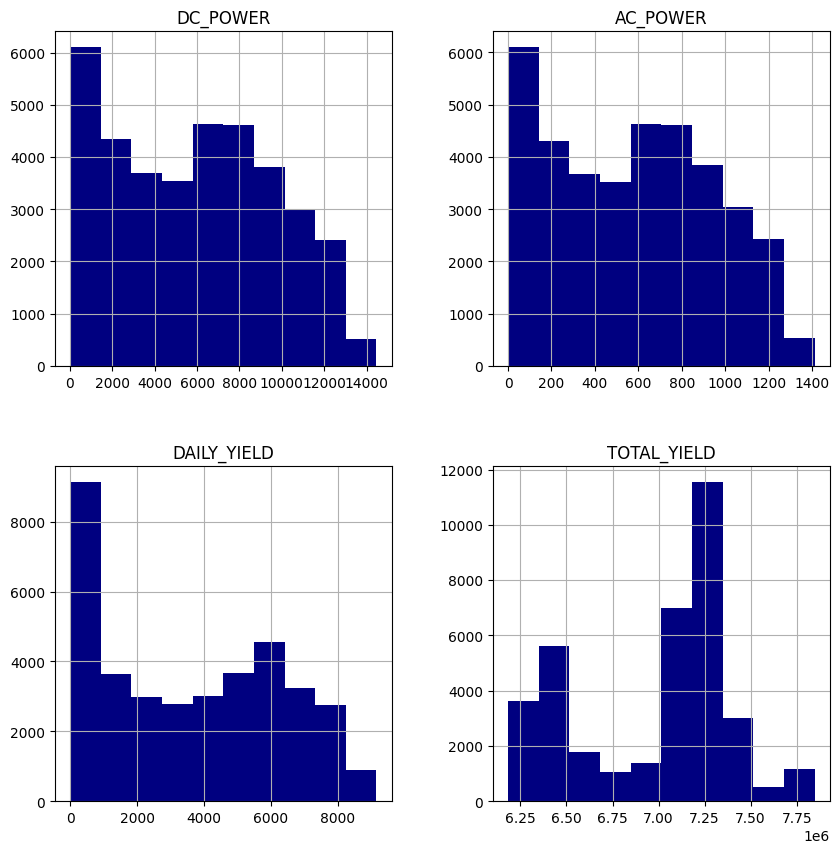

In [5]:
sample_df = prod_p1.loc[:, prod_p1.columns != 'PLANT_ID']
sample_df = sample_df[(prod_p1['DAILY_YIELD'] > 0) & (prod_p1['AC_POWER'] > 0)]
sample_df.hist(figsize=(10,10))
plt.show()

#### Observations:
<pre>
a- Data is very clean without Null values, negatives or infinites.
b- The column names are in uppercase. They will be changed to lowercase.
c- The <b>DATE_TIME</b> column is in text format and will be converted to <i>Timestamp</i>.
d- <b>DC_POWER</b> and <b>AC_POWER</b> seems to have a scale problem since <b>DC_POWER</b> should
   be very similar to    <b>AC_POWER</b> but appears to be 10 times bigger instead.
e- <b>PLANT_ID</b> column holds a single value throughout the entire dataset, this
   column will be deleted and the value stored in an external variable to
   reduce the Data Frame memory footprint.

</pre>

In [6]:
def optimize_formats(df):
    
    if df.columns[0].isupper():
        initial_size = getsizeof(df)
        supp_data = dict({'plant_id':0,'source_key':[]})
        
        # change column names to lowercase
        lower_case = lambda date: date.lower()
        df.columns = map(lower_case,df.columns)

        # encode "source_key" into integers, store riginal "source_key" in separate variable  
        encoder = LabelEncoder()
        encoder.fit(np.unique(df['source_key']))
        df['source_key']= np.array(encoder.transform(df['source_key'].values),dtype=np.int8)
        supp_data['source_key'] = encoder.classes_

        # delete "plant_id" column and stores it's value in an external variable"
        plant_id = df['plant_id'].values[0]
        df.drop(columns=['plant_id'],inplace=True)
        supp_data['plant_id'] = plant_id

        # change 'date_time' from string to pd.Timestamp
        df['date_time'] =pd.to_datetime(df['date_time'].values, dayfirst=True)
        final_size = getsizeof(df) + getsizeof(supp_data)
        print(f'Initial size: {initial_size/1e6:.2f} Mb')
        print(f'Final size:    {final_size/1e6:.2f} Mb')
        print(f"Memory footprint reduction: {(initial_size - final_size)/initial_size*100:.2f}%")
    else:
        raise ValueError("Formats allready optimized !")
    return df, supp_data

In [7]:
prod_p1, prod_p1_supp_data = optimize_formats(prod_p1)

Initial size: 12.72 Mb
Final size:    2.82 Mb
Memory footprint reduction: 77.84%


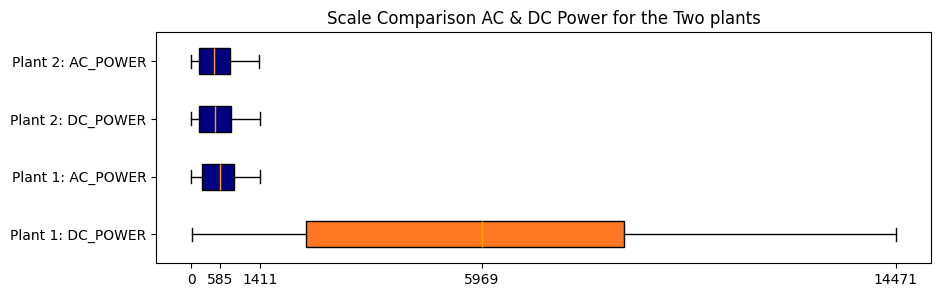

In [8]:
# visualizing ac_power and dc_power scales without zeros

prod_p1_dc_power = prod_p1[prod_p1['dc_power'] > 0]['dc_power'].values
prod_p1_ac_power = prod_p1[prod_p1['ac_power'] > 0]['ac_power'].values

prod_p2 = pd.read_csv("F:\\UNI courses\\semester 2 year 3\\optimization techniques\\project\\Plant_2_Generation_Data.csv")
prod_p2_dc_power =prod_p2[prod_p2['DC_POWER'] > 0]['DC_POWER'].values
prod_p2_ac_power =prod_p2[prod_p2['AC_POWER'] > 0]['AC_POWER'].values

data = [prod_p1_dc_power,prod_p1_ac_power,prod_p2_dc_power,prod_p2_ac_power]
labels = ['Plant 1: DC_POWER','Plant 1: AC_POWER',
            'Plant 2: DC_POWER','Plant 2: AC_POWER']
plt.figure(figsize=(10,3))
patches = plt.boxplot(data ,labels=labels,vert=False, patch_artist=True)
patches['boxes'][0].set_facecolor( '#FF7722')
plt.xticks([0,np.median(prod_p1_ac_power),prod_p1_ac_power.max(),
            np.median(prod_p1_dc_power),prod_p1_dc_power.max()])
plt.title("Scale Comparison AC & DC Power for the Two plants")

plt.show()


In [9]:
# comparison of DC/AC power ratio (efficiency) between plants 1 & 2 

plant2_eff = 100*np.max(prod_p2_ac_power)/np.max( prod_p2_dc_power)
print(f"Power ratio AC/DC (Efficiency) plant #2: {plant2_eff:0.3f}%")
plant1_eff = 100*np.max(prod_p1_ac_power)/np.max(prod_p1_dc_power )
print(f"Power ratio AC/DC (Efficiency) plant #1:  {plant1_eff:0.3f}%")
print(f"Eff_plant_1/Eff_plant_2 (using max values): {plant2_eff/plant1_eff:.3f}")

Power ratio AC/DC (Efficiency) plant #2: 97.501%
Power ratio AC/DC (Efficiency) plant #1:  9.750%
Eff_plant_1/Eff_plant_2 (using max values): 10.000


In [10]:
efficiency = ((prod_p2_ac_power)/np.mean(prod_p2_dc_power))/(np.mean(prod_p1_ac_power)/np.mean(prod_p1_dc_power))
print(f"Scale ratio comparison ( using mean values ): {efficiency.mean():.3f}")

Scale ratio comparison ( using mean values ): 10.001


the difference between the scale of the values of ac_power and
      dc_power in the plant #1 are due to an error in the decimal
      point location. 
      
the
   ratio is exactly 10, which means the scales are off by exactly one
   digit.


**rescaling dc_power of plant #1**

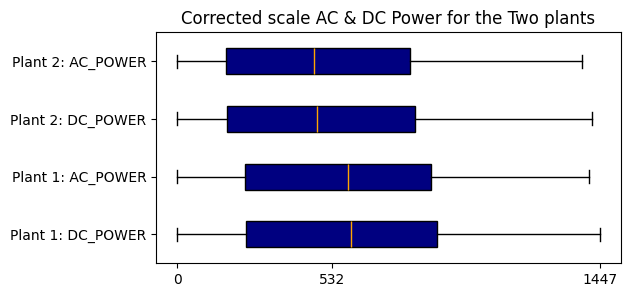

In [11]:
def scale_dc_power(df):
    df['dc_power'] = df['dc_power'].values/10
    return df
prod_p1 = scale_dc_power(prod_p1)
prod_p1_dc_power = prod_p1['dc_power'][prod_p1['dc_power']>0].values
data2 = [prod_p1_dc_power,prod_p1_ac_power,prod_p2_dc_power,prod_p2_ac_power]
plt.figure(figsize=(6,3))
patches = plt.boxplot(data2,showfliers=False, vert=False,labels=labels, patch_artist=True)
median_2 = np.median(np.hstack(data2))
max_val_2 = prod_p1_dc_power.max()
plt.xticks([0,median_2,max_val_2])
plt.title("Corrected scale AC & DC Power for the Two plants")
plt.show()

In [12]:
def plot_inverter(df, supp_data, key_n, start=0, end=3400):
    '''
    Visualizes the ac_power, dc_power, daily_yield and total_yield of
    an inverter in a given datetime interval
    
    returns: List of pyplot.axes for the 4 variables.
    
    Variables
    ---------
    df   : Pandas DataFrame with the production data
    key_n: int from 0 to 21 representing the inverter number
    start: int (0-3400) representing the start datetime
    end  : int (0-3400) representing the end datetime
    '''
    
    df = df.copy()
    fig_size = (12,12)
    fig = plt.figure(figsize=fig_size)
    for i,item in enumerate(['ac_power','dc_power','daily_yield',
                             'total_yield']):
        xsize,ysize = fig_size
        key_data = df[df['source_key'] == key_n].iloc[start:end]
        plt.subplot(4,1,i+1)
        plt.plot(key_data['date_time'].values, key_data[item].values,
                 linewidth=1.5,alpha=.4)
        ymin = key_data[item].values.min()
        ymax = key_data[item].values.max() 
        plt.yticks(np.linspace(ymin, ymax, 5))
#       plt.xticks(key_data['date_time'],key_data['date_time'],rotation=90)
        plt.xticks([]) # plotting the xlabels takes too much time !!!

        key  = supp_data['source_key'][key_n]
        start_date= pd.to_datetime(key_data['date_time'].iloc[0]).date()
        end_date  = pd.to_datetime(key_data['date_time'].iloc[-1]).date()
        text=f'{item}, inverter #{key_n} ({key})\nfrom {start_date} to {end_date}'
        plt.title(text, fontsize=12)
    fig.subplots_adjust(hspace=0.3)
#     plt.savefig(f'inverter_{key}.png')
    return fig.axes


a sample taken from one of the inverters
in the arrows dict xy are pints as % of x and y axis
 in xy are 4 matrices, one for each plot 'ac_power', 'dc_power',
       'daily_yield' & 'total_yield'

In [13]:
# a sample taken from one of the inverters
# in the arrows dict xy are pints as % of x and y axis
# in xy are 4 matrices, one for each plot 'ac_power', 'dc_power',
#         'daily_yield' & 'total_yield'

arrows =   dict({
            'saffron_arrows':
            dict({'color':'#FF7722','angle':140,
                  'xy': [[[.280,.1]],
                         [[.280,.1]],
                         [[.295,.1],[.785,.05]],
                         []]}),
            'green_arrows':
            dict({'color':'g','angle':15,
                  'xy':[[],
                        [],
                        [[.39,.79],[.64,.85],[.7,.73],[.82,.88]],
                        []]})
                })

def annotate_arrows(axes,arrows):
    for j,ax in enumerate(axes):
        for i,arrow in enumerate(arrows.values()):
            for xy_raw in arrow['xy'][j]:
                rad = lambda angle: angle/360*2*np.pi
                xmin,xmax = ax.get_xlim()
                xspan = xmax-xmin
                ymin,ymax = ax.get_ylim()
                yspan = ymax-ymin
                xy_new = np.multiply(xy_raw,[xspan,yspan])+np.array([xmin,ymin])
                xy_text= np.array(xy_new)+ np.array([
                                    0.041*np.cos(rad(arrow['angle']))*xspan,
                                    0.250*np.sin(rad(arrow['angle']))*yspan])
                ax.annotate("",xy=xy_new,xytext=xy_text,
                            arrowprops=dict(arrowstyle="->",mutation_aspect=1.2,
                            mutation_scale=15,color=arrow['color'],lw=3))

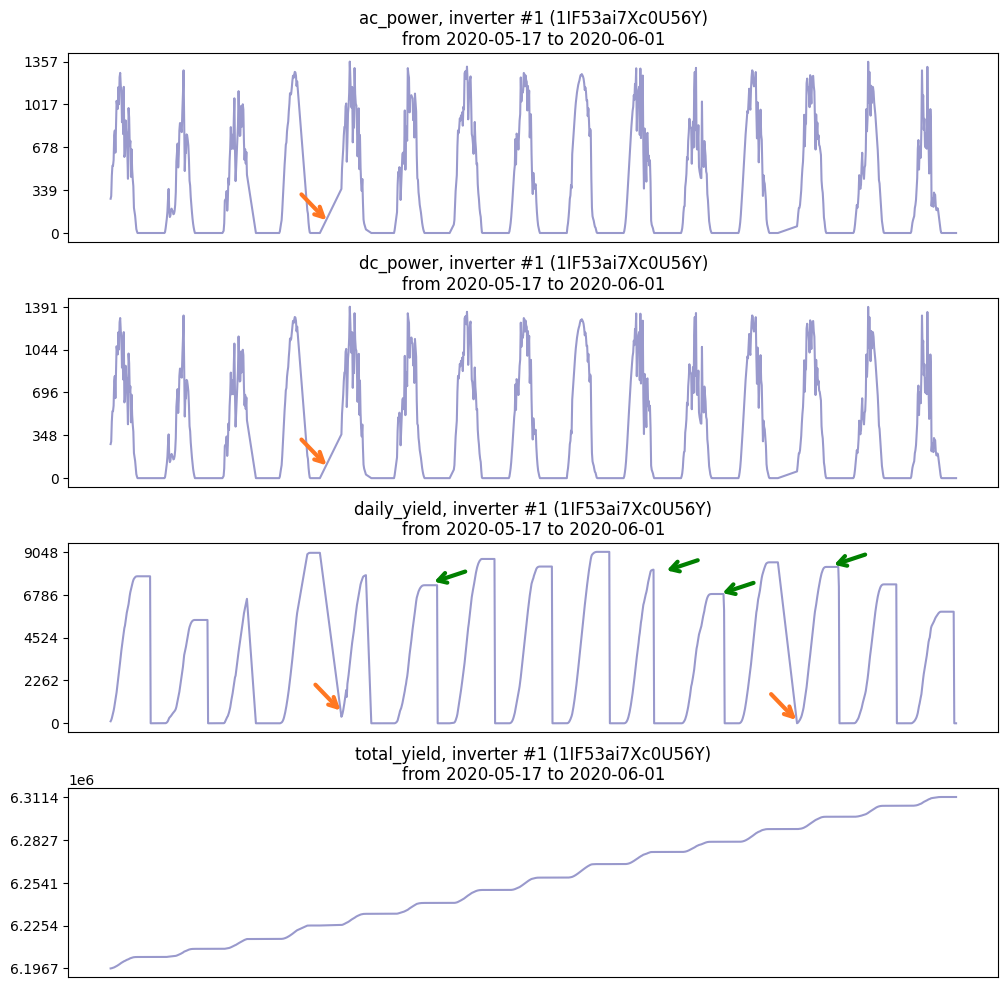

In [14]:
#values for key_n= 14, start=200, end=1500
axes = plot_inverter(prod_p1,prod_p1_supp_data,1,start=200,end=1500)
annotate_arrows(axes, arrows)

### Findings

**Distorted Waveforms (Saffron Arrows):**

The graph shows instances where the waveforms are distorted.
This distortion suggests that the data might have anomalies, missing values, or inconsistencies.
Such distortions can lead to inaccurate calculations and results if not addressed.

**Inconsistent Daily Yield (Green Arrows):**

Some instances of the daily_yield do not show the usual top plateau, indicating that the data is not standardized.
The daily_yield dropping to zero at different times suggests that there is inconsistency in how the data is recorded or processed.


### Observations

**Missing Timestamps and Zero Values:**

The distorted waveforms might be due to missing timestamps, where the corresponding values should be zero.
Imputing these missing values (filling in the gaps with appropriate data) can help regularize the waveforms and make the data more suitable for analysis.

**Standardizing Daily Yield:**

Solar panels do not produce energy in the absence of light.
When ac_power (the alternating current power output) is zero, the daily_yield should also be zero.
Standardizing the daily_yield to be zero when ac_power is zero can help in making the data consistent and more reliable.




_While the histograms show no null values, it is essential to dig deeper into the time-series data to ensure there are no gaps, inconsistencies, or inappropriate zero values that could affect your analysis._


In [15]:
def plot_all_ac_power(prod_df):
    '''this function plot all values for ac_power to visualize
    at which time the solar power plant begins and ends production
    to be able to separate day from night'''
    
    date_time = pd.DatetimeIndex(prod_df['date_time'].values)
    xlabels = np.unique(date_time.strftime("%H:%M"))
    date_time = date_time.hour + date_time.minute/60
    xticks =  np.unique(date_time)
    ac_power = prod_df['ac_power'].values
    plt.figure(figsize=(11,5))
    ax = plt.gca()
    ax.scatter(date_time,ac_power,s=1)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels,rotation=90,fontsize=11)
    #not necesary to show all zero values !
    xmin, xmax = ax.get_xlim()
    xmin = xmin + (xmax-xmin)*0.22
    xmax = xmax - (xmax-xmin)*0.26
    plt.gca().set_xlim((xmin,xmax))
    plt.title("ac_power by hour of the day for all inverters")
    plt.show()
    

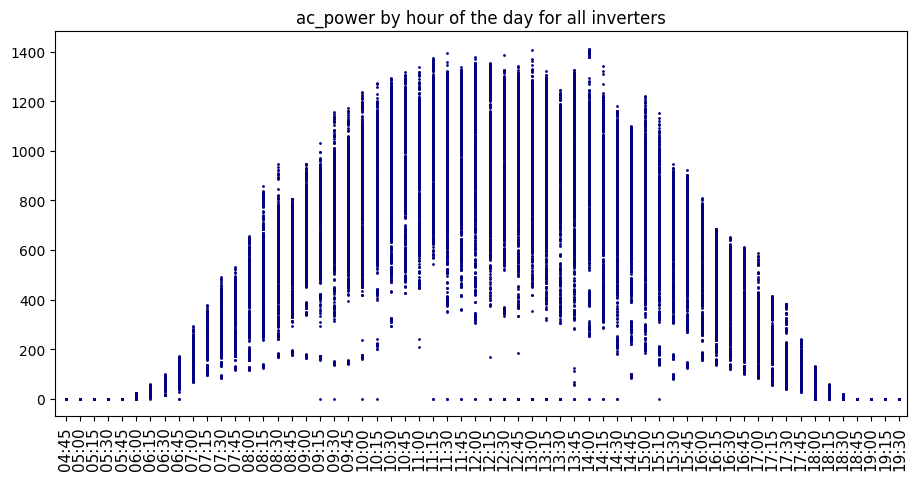

In [16]:
plot_all_ac_power(prod_p1)

In [17]:
date_time = pd.DatetimeIndex(prod_p1['date_time'].values)
date_time = date_time.minute/60 + date_time.hour
get_hr = lambda s : int(s.split(":")[0])+int(s.split(":")[1])/60
for s in ["05:45","06:00","18:30","18:45"]:
    answer = (prod_p1[date_time==get_hr(s)]['ac_power']>0).any()
    print(f"Is there any ac_power > 0 at {s} ?", answer)

Is there any ac_power > 0 at 05:45 ? False
Is there any ac_power > 0 at 06:00 ? True
Is there any ac_power > 0 at 18:30 ? True
Is there any ac_power > 0 at 18:45 ? False


There is no recorded instance of ac_power at 5:45; which means that
   there is no production before 5:45. For the same reason can be concluded
   that there are no production at or after 18:45.

  From this point on the "date_time" timestamps between 6:00 and 18:30
   will be referred as "Daytime hours"|"Day" and to the ones between 18:45
   and 5:45 as "Nighttime hours"|"Night"

 The values for ac_power, dc_power and daily_yield must be zero for every
   day between 18:45 and 5:45 (during the night) the total_yield does not
   change during these hours it can be reset to zero.

### Visulize Zeros and changes

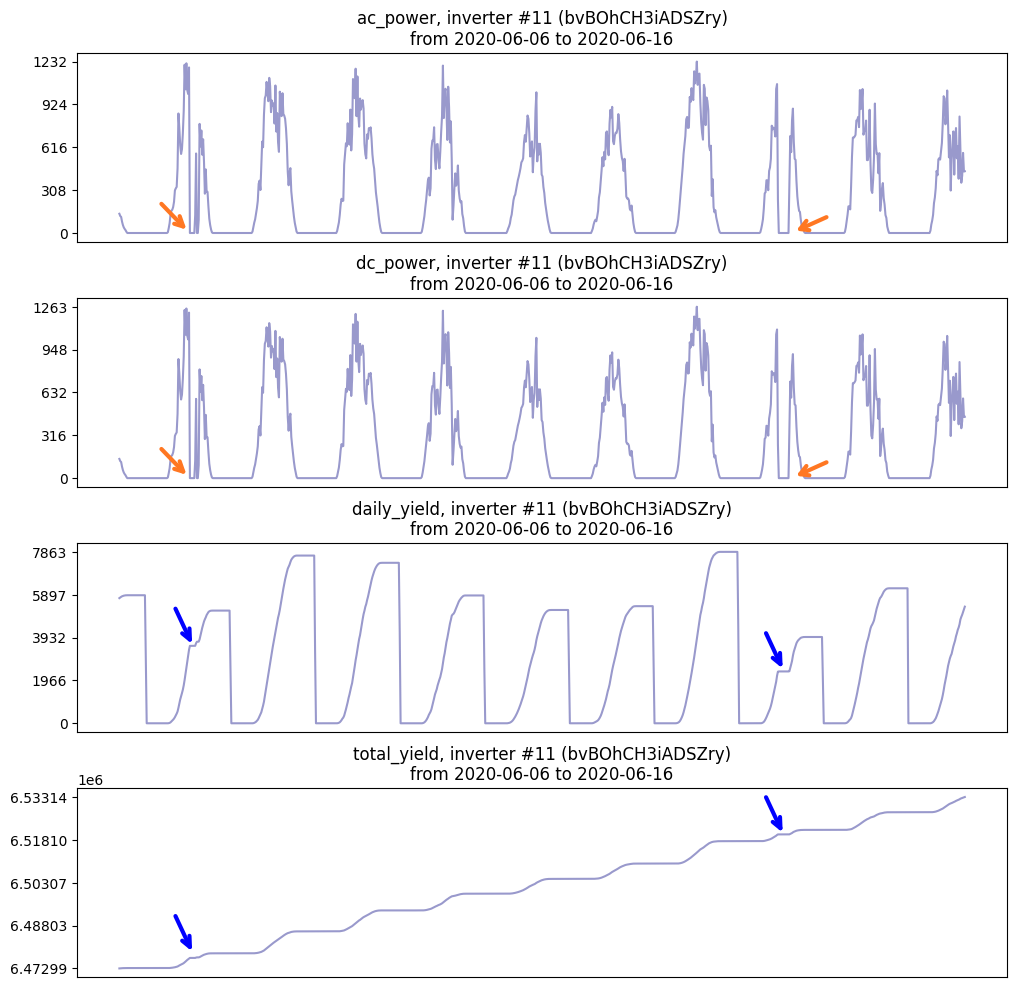

In [18]:
arrows =   dict({
            'saffron_arrows1':
            dict({'color':'#FF7722','angle':140,
                  'xy': [[[.12,.05]],
                         [[.12,.05]],
                         [],
                         []]}),
            'saffron_arrows2':
            dict({'color':'#FF7722','angle':20,
                  'xy': [[[.77,.05]],
                         [[.77,.05]],
                         [],
                         []]}),
            'green_arrows':
            dict({'color':'b','angle':120,
                  'xy':[[],
                        [],
                        [[.125,.45],[.76,.32]],
                        [[.125,.12],[.76,.75]]]})
                })
axes = plot_inverter(prod_p1,prod_p1_supp_data,11,start=2070,end=3030)
annotate_arrows(axes,arrows)

**Daily Yield Plot (Middle Plot)**

**Blue Arrows in Daily Yield:**

These arrows point to instances where the daily_yield starts to increase. This increase typically happens when the solar panels begin generating power at the start of a new day.
They also indicate where the daily_yield resets to a lower value (often zero) at the end of a day, which suggests the beginning of a new day.

**Total Yield Plot (Bottom Plot)**

**Blue Arrow in Total Yield:**

The arrow points to a similar instance in the total_yield plot. The total_yield represents the cumulative energy produced over time.
The arrow marks a point where the total_yield increases, reflecting the cumulative addition of energy produced by the solar panels.

In [19]:

def find_missing(df):
    '''
    Function to find missing timestamps ad it's corresponding missing inverters
    find_missing(df: pandas.DataFrame)
    
    Returns pandas.DataFrame object containing the columns: 
        "date_time": missing Timestamps in "date_time" or
                     present Timestamps with missing inverters.
        "source_key" : list containing the "source_key" of the missing inverters
                     for a given Timestamp''
    Parameters
    ----------
    df: production data of solar plant'''
    
    missing_data = pd.DataFrame({})
    df = df.copy()
    
    date_time, dt_count = np.unique(df['date_time'].values,return_counts=True)
    dt_range  = pd.date_range(start=date_time[0],
                              end=date_time[-1],freq="15min")
    key = np.unique(df['source_key'].values)
    
    # find the datetimes that are not present in the datetimes of the df
    missing_data['date_time'] = dt_range[np.isin(dt_range,date_time)==False]
    source_key = [key for _ in range(len(missing_data['date_time']))]
    missing_data['source_key'] = source_key
    
    # find which inverters are missing in the datetimes that have < 22 invs.   
    dt_with_missing = date_time[dt_count < 22]
    df_missing = df[np.isin(df['date_time'].values,dt_with_missing)]
    for dt in dt_with_missing:
        present_key= df_missing[df_missing['date_time']==dt]['source_key'].values
        missing_key= key[np.isin(key,present_key)==False]
        missing_data = missing_data.append({'date_time':dt,
                            'source_key':missing_key}, ignore_index=True)
    missing_data.sort_values(by=['date_time'],ignore_index=True,inplace=True)
    return missing_data

In [20]:
prod_p1_missing_data = find_missing(prod_p1)
prod_p1_missing_data

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

date_time                                         source_key
0   2020-05-15 00:00:00                                                [7]
1   2020-05-15 00:15:00                                                [7]
2   2020-05-15 00:30:00                                                [7]
3   2020-05-15 00:45:00                                                [7]
4   2020-05-15 01:15:00                                                [7]
..                  ...                                                ...
202 2020-06-06 18:45:00      [4, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21]
203 2020-06-06 19:00:00      [4, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21]
204 2020-06-06 19:15:00      [4, 7, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21]
205 2020-06-17 06:15:00  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
206 2020-06-17 06:30:00  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...

[207 rows x 2 columns]

**how many entirely missing datetimes are there?**

**how many entries with missing inverters are there ?**

**how many are at night and how many during the day?**

In [21]:
 
def missing_summary(df, missing_data):
    
    df = df.copy()
    # present datetimes in the dataset
    pdt = np.unique(df['date_time'].values)
    
    # expected datetimes according to the dates in 15 min intervals
    edt = pd.date_range(start=pdt[0], end=pdt[-1],freq="15min")
    edt = len(edt)
    
    # All missing datetimes and incomplete datetimes
    mdt = pd.DatetimeIndex(missing_data['date_time'].values)
    
    # incomplete dt ( dt is present but not  for all inverters )
    idt= len(mdt) -(edt-len(pdt))
    
    # day missing datetimes
    dmdt = mdt.hour + mdt.minute/60
    dmdt = mdt[(dmdt >= 6.0) & (dmdt <= 18.5)]
    dmdt = len(dmdt)
    
    # night missing datetimes
    nmdt= len(mdt) - dmdt
    pdt = len(pdt)
    mdt = len(mdt)
    print(f"Total expected datetimes : {edt}")
    print(f"Total present datetimes  : {pdt}\n")
    text = "Total dt with missing entries or absent:"
    print(f"{text}{str(mdt).rjust(5)} ({100*mdt/edt:.2f}%)\n")
    text = "Absent dt (all inverters are missing)  :"
    print(f"{text}{str(edt-pdt).rjust(5)} ({100*(edt-pdt)/edt:.2f}%)")
    text = "Present dt with some inverters missing :"
    print(f"{text}{str(idt).rjust(5)} ({100*idt/edt:.2f}%)\n")
    text = "All dt. with missing inv. in day time  :"
    print(f"{text}{str(dmdt).rjust(5)} ({100*dmdt/edt:.2f}%)")
    text = "All dt. with missing inv. in the night :"
    print(f"{text}{str(nmdt).rjust(5)} ({100*nmdt/edt:.2f}%)")

In [22]:
prod_p1_missing_data = find_missing(prod_p1)
missing_summary(prod_p1, prod_p1_missing_data)

Total expected datetimes : 3264
Total present datetimes  : 3158

Total dt with missing entries or absent:  207 (6.34%)

Absent dt (all inverters are missing)  :  106 (3.25%)
Present dt with some inverters missing :  101 (3.09%)

All dt. with missing inv. in day time  :   55 (1.69%)
All dt. with missing inv. in the night :  152 (4.66%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

**The majority of missing values are at night, those can be easily imputed
   since there is no production at night, thus the value for power and yield is 
   zero.**

In [23]:
def fill_night_missing(df, missing_data):
    '''fill nighttime missing values into the DataFrame with 0 for dc_power,
    ac_power and daily_yield and the total_yield missing is replaced with the
    nearest previous value'''
    
    cols = ['date_time','source_key','dc_power','ac_power',
            'daily_yield','total_yield'] 
    new_entries = pd.DataFrame([],columns=cols)
    night_ix = pd.DatetimeIndex(missing_data['date_time'].values)
    night_ix = night_ix.hour + night_ix.minute/60
    night_ix = (night_ix < 6.00) | (night_ix > 18.5)
    night_missing = missing_data[night_ix].explode('source_key')
    for key in np.unique(night_missing['source_key'].values):
        key_data = df[df['source_key']==key]
        
        #source_key missing during the night time = skmnt
        skmnt = night_missing[night_missing['source_key']==key]['date_time'].values
        skmnt = pd.DatetimeIndex(skmnt)
        index = np.searchsorted( key_data['date_time'].values,skmnt)
        nearest_total_yield = key_data.iloc[index-1]['total_yield']
        source_key  = np.full(len(index),key, dtype=np.int8)
        zeros = np.full(len(index),0.0, dtype=np.float32)
        total_yield = np.full(len(index),nearest_total_yield, dtype=np.float32)
        intermediate_df = pd.DataFrame( zip(skmnt, source_key,
                                            zeros, zeros, zeros, total_yield),
                                            columns = cols)
        new_entries = new_entries.append(intermediate_df,ignore_index=True )
    new_entries['source_key'] = np.array(new_entries['source_key' ].values, np.int8)
    df = df.append(new_entries,ignore_index=True)
    df.sort_values(by=['date_time'],ascending=True,ignore_index=True, inplace=True)
    return df

def std_daily_yield(df):
    'replace daily_yield with zero in hours between 18:30 and 6:00'
    
    date_time = pd.DatetimeIndex(df['date_time'].values)
    date_time = date_time.hour + date_time.minute/60
    ix = np.multiply((date_time <= 18.5), (date_time >= 6))
    df['daily_yield'] = np.multiply(df['daily_yield'].values,ix)
   
    return df

In [24]:
def remove_daytime_zeros(prod_df):
    date_time = pd.DatetimeIndex(prod_df['date_time'].values)
    date_time = date_time.hour + date_time.minute/60
    day_ix = (date_time > 6.5) & (date_time < 18)
    daytime_zeros = day_ix & (prod_df['ac_power'] <= 0)
    return prod_df[daytime_zeros == 0]

In [25]:
prod_p1 = remove_daytime_zeros(prod_p1)
prod_p1 = fill_night_missing(prod_p1, prod_p1_missing_data)
prod_p1 = std_daily_yield(prod_p1)

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

In [26]:
prod_p1_missing_data = find_missing(prod_p1)
missing_summary(prod_p1, prod_p1_missing_data)

Total expected datetimes : 3264
Total present datetimes  : 3232

Total dt with missing entries or absent:   84 (2.57%)

Absent dt (all inverters are missing)  :   32 (0.98%)
Present dt with some inverters missing :   52 (1.59%)

All dt. with missing inv. in day time  :   84 (2.57%)
All dt. with missing inv. in the night :    0 (0.00%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

**Exploring manually An anomalie was found in the total_yield
in the inverter 7 (counting from 0 to 21)**

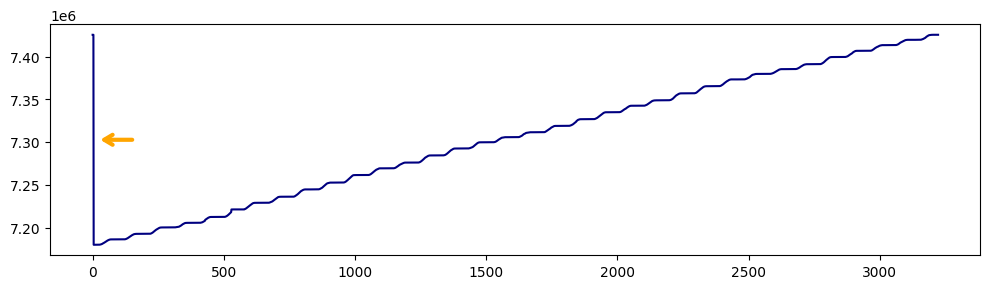

The first 4 values are greater than the 5th


array([7425442., 7425442., 7425442., 7425442., 7179966., 7179966.])

In [27]:
plt.figure(figsize=(12,3))
sample = prod_p1[prod_p1['source_key']==7]['total_yield'].values
plt.plot(range(len(sample)),sample)
ax = [plt.gca()]
arrow =   dict({
            'saffron_arrows1':
            dict({'color':'orange','angle':0,
                  'xy': [[[.05,.5]],
                         [],
                         [],
                         []]})})
annotate_arrows(ax,arrow)
plt.show()
print("The first 4 values are greater than the 5th")
sample[0:6]

**Therefore the first 4 values will be droped for this inverter**

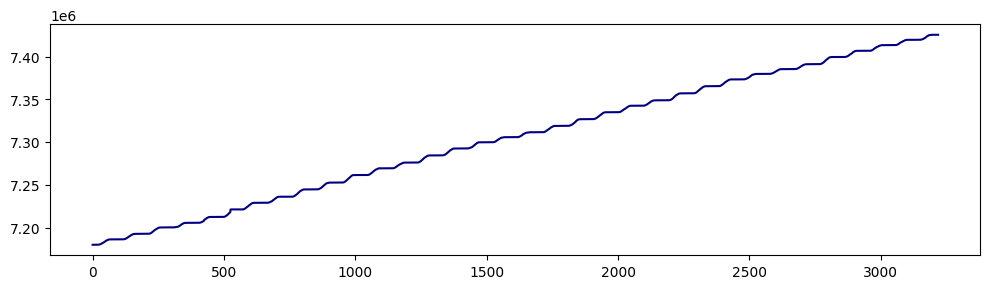

array([7179966., 7179966., 7179966., 7179966., 7179966., 7179966.])

In [28]:
prod_p1.drop(index=prod_p1[prod_p1['source_key']==7].iloc[:4].index,inplace=True)
plt.figure(figsize=(12,3))
sample = prod_p1[prod_p1['source_key']==7]['total_yield'].values
plt.plot(range(len(sample)),sample)
plt.show()
sample[0:6]

# Data Exploration preparation and insights

### Plant 1 Weather Sensor

In [29]:
p1ws = pd.read_csv("F:\\UNI courses\\semester 2 year 3\\optimization techniques\\project\\Plant_1_Weather_Sensor_Data.csv")
p1ws.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [30]:
p1ws.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

In [31]:
def optimize_formats_ws(df):
    if df.columns[0].isupper():
        initial_size = getsizeof(df)
        supp_data = dict({'plant_id':0,'sensors':[]})

        # drop "source_key" , store original "source_key" in separate variable
        supp_data['sensors'] = df['SOURCE_KEY'].values[0]
        df.drop(columns=['SOURCE_KEY'], inplace=True)

        # drop "plant_id" column and stores it's value in an external variable"
        supp_data['plant_id'] = df['PLANT_ID'].values[0]
        df.drop(columns=['PLANT_ID'], inplace=True)

        # change column names to lowercase, rename columns to shorter name
        df.rename(columns={'DATE_TIME':'date_time','AMBIENT_TEMPERATURE': 'ambient_t',
                           'MODULE_TEMPERATURE':'module_t', 'IRRADIATION':'irradiation'},
                 inplace=True)

        # change 'date_time' from string to pd.Timestamp
        df['date_time'] = pd.DatetimeIndex(df['date_time'].values, dayfirst=True)
        final_size = getsizeof(df) + getsizeof(supp_data)
        print(f'Initial size: {initial_size/1e6:.2f} Mb')
        print(f'Final size:    {final_size/1e6:.2f} Mb')
        print(f"Memory footprint reduction: {(initial_size - final_size)/initial_size*100:.2f}%")
    else:
        raise ValueError("Formats allready optimized !")
    return df, supp_data

In [32]:
p1ws, p1ws_supp_data = optimize_formats_ws(p1ws)

Initial size: 0.57 Mb
Final size:    0.10 Mb
Memory footprint reduction: 82.16%


In [33]:
p1ws_supp_data['sensors'],p1ws_supp_data['plant_id']

('HmiyD2TTLFNqkNe', 4135001)

In [34]:
def plot_sensor(df, supp_data, start=0, end=3400,fig_size=(12,9)):
    
    df = df.copy().iloc[start:end]
    fig = plt.figure(figsize=fig_size)
    for i,item in enumerate(['ambient_t','module_t', 'irradiation']):
        xsize,ysize = fig_size
        plt.subplot(3,1,i+1)
        plt.plot(df['date_time'].values,
                    df[item].values,linewidth=1.5,alpha=0.4)
        plt.xticks([])
        sensor  = supp_data['sensors']
        start_date= pd.to_datetime(df['date_time'].iloc[0]).date()
        end_date  = pd.to_datetime(df['date_time'].iloc[-1]).date() 
        plt.title(f'{item} for sensor {sensor} from {start_date} to {end_date}',
                  fontsize=12)
#     plt.savefig(f'plant_1_sensor.png')
    return fig.axes


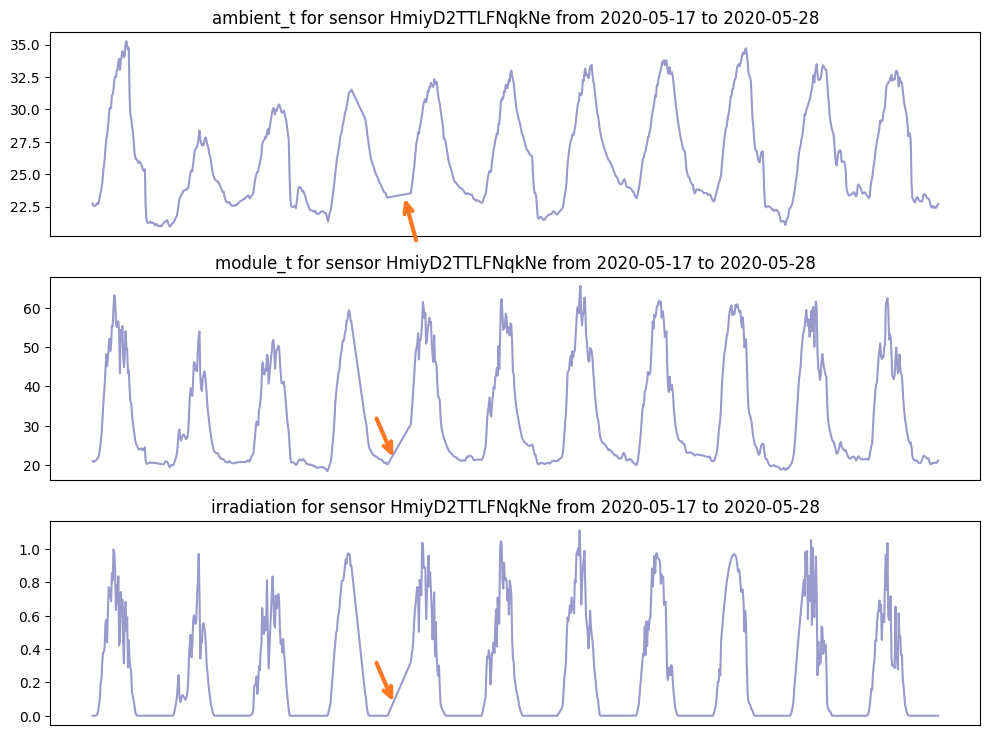

In [35]:
arrows =   dict({
            'saffron_arrows':
            dict({'color':'#FF7722','angle':290,
                  'xy': [[[.38,.2]],[],[]]}),
            'saffron_arrows2':
            dict({'color':'#FF7722','angle':120,
                  'xy': [[],[[.37,.1]],[[.37,.1]]]})
                })
axes = plot_sensor(p1ws,p1ws_supp_data, start=200,end=1200)
annotate_arrows(axes,arrows)

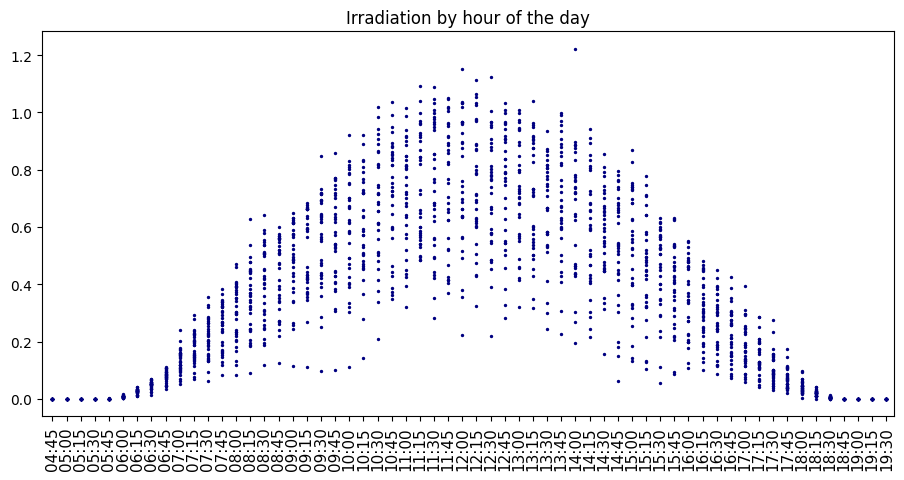

In [36]:
# visualize distribution of irradiation by hour
def plot_irradiation(sensor_df):
    df = sensor_df.copy()
    ir = df['irradiation'].values
    plt.figure(figsize=(11,5))
    date_time = pd.DatetimeIndex(df['date_time'].values)
    xlabels = np.unique(date_time.strftime("%H:%M"))
    date_time = date_time.hour + date_time.minute/60
    xticks = np.unique(date_time)
    plt.xticks(xticks,xlabels,rotation=90,fontsize=11)
    plt.scatter(date_time,ir,s=2)
    xmin, xmax = plt.gca().get_xlim()
    xmin = xmin + (xmax-xmin)*0.22
    xmax = xmax - (xmax-xmin)*0.26
    plt.gca().set_xlim((xmin,xmax))
    plt.title("Irradiation by hour of the day")
    plt.show()
plot_irradiation(p1ws)

In [37]:
date_time = pd.DatetimeIndex(p1ws['date_time'].values)
date_time = date_time.minute/60 + date_time.hour
get_hr = lambda string : int(string.split(":")[0])+int(string.split(":")[1])/60
for text_time in ["05:45","06:00","18:30","18:45"]:
    answer = (p1ws[date_time==get_hr(text_time)]['irradiation'] > 0).any()
    print(f"Is there any irradiation > 0 at {text_time} ?", answer)

Is there any irradiation > 0 at 05:45 ? True
Is there any irradiation > 0 at 06:00 ? True
Is there any irradiation > 0 at 18:30 ? True
Is there any irradiation > 0 at 18:45 ? True


# Data Exploration preparation and insights

### Plant 2 Production Data

In [38]:
prod_p2 = pd.read_csv("F:\\UNI courses\\semester 2 year 3\\optimization techniques\\project\\Plant_2_Generation_Data.csv")
prod_p2[prod_p2['DC_POWER']>0].head()

DATE_TIME  PLANT_ID       SOURCE_KEY   DC_POWER   AC_POWER  \
528  2020-05-15 06:00:00   4136001  4UPUqMRk7TRMgml  15.406667  14.860000   
529  2020-05-15 06:00:00   4136001  81aHJ1q11NBPMrL  14.773333  14.246667   
530  2020-05-15 06:00:00   4136001  9kRcWv60rDACzjR  15.380000  14.840000   
531  2020-05-15 06:00:00   4136001  Et9kgGMDl729KT4  14.973333  14.440000   
532  2020-05-15 06:00:00   4136001  IQ2d7wF4YD8zU1Q  15.160000  14.633333   

     DAILY_YIELD   TOTAL_YIELD  
528     0.800000  2.429012e+06  
529     0.733333  1.215279e+09  
530     1.866667  2.247720e+09  
531     1.000000  1.704251e+06  
532     0.733333  1.994153e+07

In [39]:
prod_p2.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [40]:
prod_p2, prod_p2_supp_data = optimize_formats(prod_p2)

Initial size: 12.73 Mb
Final size:    2.78 Mb
Memory footprint reduction: 78.19%


In [41]:
prod_p2_supp_data['source_key'],prod_p2_supp_data['plant_id']

(array(['4UPUqMRk7TRMgml', '81aHJ1q11NBPMrL', '9kRcWv60rDACzjR',
        'Et9kgGMDl729KT4', 'IQ2d7wF4YD8zU1Q', 'LYwnQax7tkwH5Cb',
        'LlT2YUhhzqhg5Sw', 'Mx2yZCDsyf6DPfv', 'NgDl19wMapZy17u',
        'PeE6FRyGXUgsRhN', 'Qf4GUc1pJu5T6c6', 'Quc1TzYxW2pYoWX',
        'V94E5Ben1TlhnDV', 'WcxssY2VbP4hApt', 'mqwcsP2rE7J0TFp',
        'oZ35aAeoifZaQzV', 'oZZkBaNadn6DNKz', 'q49J1IKaHRwDQnt',
        'rrq4fwE8jgrTyWY', 'vOuJvMaM2sgwLmb', 'xMbIugepa2P7lBB',
        'xoJJ8DcxJEcupym'], dtype=object),
 4136001)

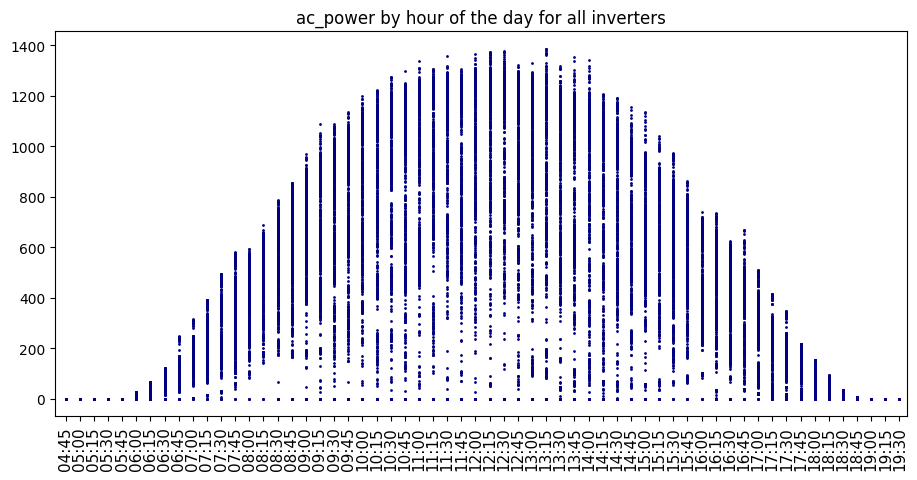

In [42]:
plot_all_ac_power(prod_p2)

In [43]:
prod_p2_missing_data = find_missing(prod_p2)
missing_summary(prod_p2, prod_p2_missing_data)

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

Total expected datetimes : 3264
Total present datetimes  : 3259

Total dt with missing entries or absent:  909 (27.85%)

Absent dt (all inverters are missing)  :    5 (0.15%)
Present dt with some inverters missing :  904 (27.70%)

All dt. with missing inv. in day time  :  485 (14.86%)
All dt. with missing inv. in the night :  424 (12.99%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

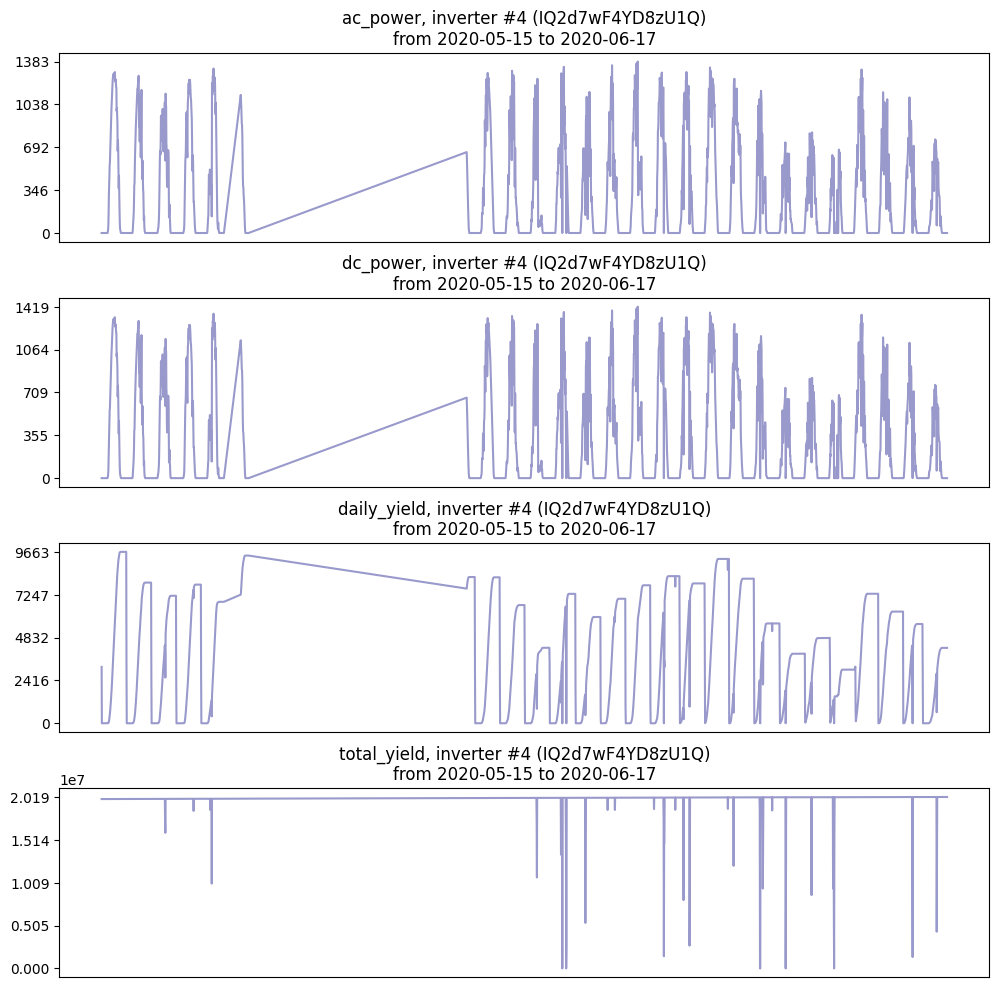

In [44]:
_ = plot_inverter(prod_p2,prod_p2_supp_data,4,start=0)


We have similar situations to those encountered in the plant 1

   production dataset:
      • Missing timestamps during day and during night
      • Production starts and ends at 6:00 and 18:30 respectively.

   Additionally we encounter many anomalies in the total_yield
   that appear as very pronounced peaks pointing downwards.

   Other anomalies seems to happen simultaneously in the daily_yield.


**Fill the night-missing time-stamps with zeros for plant #2**

**Actualize the missing values after night-missing are filled**

**Standardize daily_yield to be zero when there is no longer production**

**Remove zero or negative outliers from daytime**


In [45]:
prod_p2 = fill_night_missing(prod_p2, prod_p2_missing_data)
prod_p2_missing_data = find_missing(prod_p2)
prod_p2 = std_daily_yield(prod_p2)
prod_p2 = remove_daytime_zeros(prod_p2)
missing_summary(prod_p2, prod_p2_missing_data)

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

Total expected datetimes : 3264
Total present datetimes  : 3248

Total dt with missing entries or absent:  485 (14.86%)

Absent dt (all inverters are missing)  :   16 (0.49%)
Present dt with some inverters missing :  469 (14.37%)

All dt. with missing inv. in day time  :  485 (14.86%)
All dt. with missing inv. in the night :    0 (0.00%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

**Key Differences and Improvements**

**1. Reduction in Total Missing Entries:**

The total missing entries decreased from 909 (27.85%) to 858 (26.29%). This shows an improvement as some of the missing entries have been filled.

**2. Night-Time Missing Entries:**

Initially, there were 424 (12.99%) missing entries during the night.
After the cleanup, night-time missing entries were reduced to 0 (0.00%), indicating that the timestamps during the night have been filled with zeros.

**3. Day-Time Missing Entries:**

Before cleaning, 485 (14.86%) of the missing entries occurred during the day.
After cleaning, all 858 (26.29%) of the remaining missing entries occur during the day. This suggests that only day-time missing data remains, and the night-time data is now complete.

**4. Absent Data Entries (All Inverters Missing):**

The number of absent data entries where all inverters are missing increased slightly from 5 (0.15%) to 16 (0.49%). This might be due to the process of standardization and removal of invalid data points.

**5. Entries with Some Inverters Missing:**

The number of entries with some inverters missing decreased from 904 (27.70%) to 842 (25.80%).

### filter out the anomalies of the total_yield for plant 1 and plant 2

In [46]:
def filter_total_yield_anomalies(prod_df, variable):
    new_ix = [] #list of the indexes without anomalies
    for key in np.unique(prod_df['source_key'].values):
        key_df = prod_df[prod_df['source_key']==key]
        field = key_df[variable].values
        if variable == 'daily_yield':
                field = np.cumsum(field)
        filter_ix = (field[1:]-field[0:-1]) < 0
        present_outliers = np.any(filter_ix == True)
        while present_outliers:
            dt = pd.DatetimeIndex(key_df['date_time'].values)
            field = key_df[variable].values
            if variable == 'daily_yield':
                field = np.cumsum(field)
            filter_ix = np.hstack([[False],(field[1:]-field[0:-1]) < 0])
            key_df = key_df[filter_ix == False]
            field = key_df[variable].values
            filter_ix = np.hstack([(field[1:]-field[0:-1]) < 0,[False]])
            present_outliers = np.any(filter_ix == True)
        new_ix += list(key_df.index)
    new_ix = list(np.sort(new_ix))
    init = len(prod_df.index)
    end  = len(new_ix)
    print(f'Initial Dataframe Length: {init}')
    print(f'Final Dataframe length: {end}')
    print(f'filtered out records: {init-end} ({(init-end)/init*100:.1f}%)')
    return prod_df.loc[new_ix,:]

Initial Dataframe Length: 65739
Final Dataframe length: 64098
filtered out records: 1641 (2.5%)


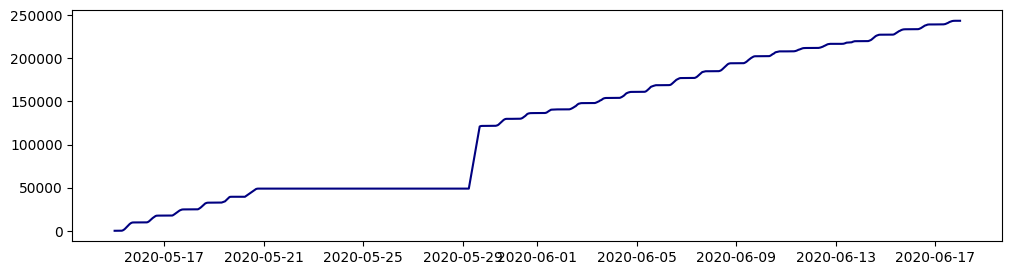

In [47]:
prod_p2 = filter_total_yield_anomalies(prod_p2,'total_yield')
sample = prod_p2[prod_p2['source_key']==4]
dt = sample['date_time'].values
plt.figure(figsize=(12,3))
ty = sample['total_yield'].values
plt.plot(dt,ty-ty.min())
plt.show()

Initial Dataframe Length: 70874
Final Dataframe length: 70823
filtered out records: 51 (0.1%)


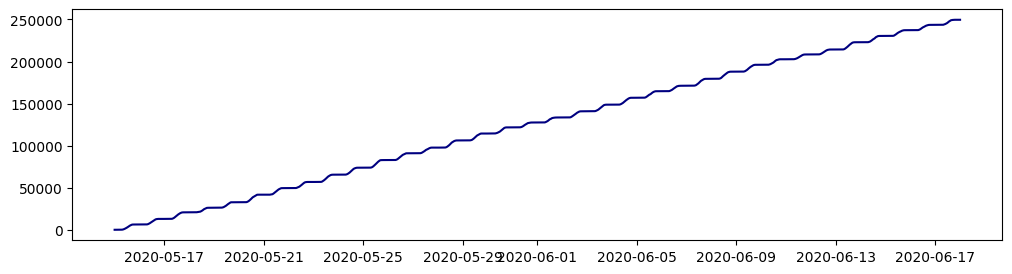

In [48]:
prod_p1 = filter_total_yield_anomalies(prod_p1,'total_yield')
sample = prod_p1[prod_p1['source_key']==2]
dt = sample['date_time'].values
plt.figure(figsize=(12,3))
ty = sample['total_yield'].values
plt.plot(dt,ty-ty.min())
plt.show()

### filter out the anomalies of the daily_yield for plant 1 and plant 2

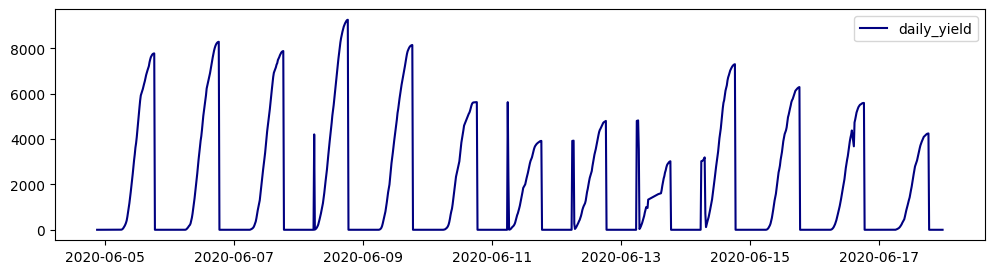

In [49]:
#plant 2
sample = prod_p2.copy()[prod_p2['source_key']==4]
dt = pd.DatetimeIndex(sample['date_time'].values)
plt.figure(figsize=(12,3))
daily_yield = sample['daily_yield'].values
n=1500
m=3500
plt.plot(dt[n:m], daily_yield[n:m], label='daily_yield')
plt.legend()
plt.show()

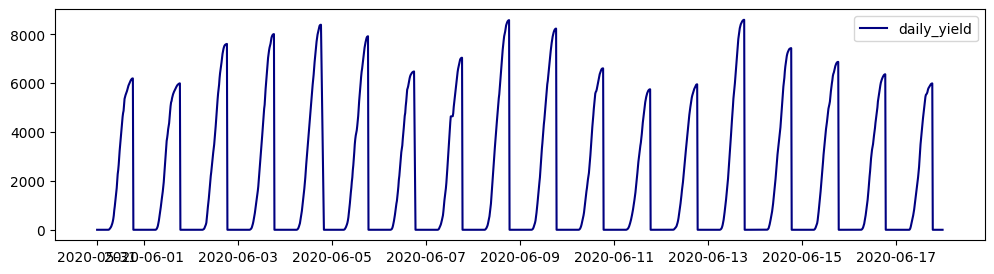

In [50]:
#plant 1
sample = prod_p1.copy()[prod_p1['source_key']==4]
dt = pd.DatetimeIndex(sample['date_time'].values)
plt.figure(figsize=(12,3))
daily_yield = sample['daily_yield'].values
n=1500
m=3500
plt.plot(dt[n:m], daily_yield[n:m], label='daily_yield')
plt.legend()
plt.show()

In [51]:
def filter_daily_yield_anomalies(prod_df):
    df = prod_df.copy()
    initial_size = len(df)
    
    def get_filter_values(sub_df):
        dt = pd.DatetimeIndex(sub_df['date_time'].values)
        daily_yield = sub_df['daily_yield'].values
        delta = np.hstack([[0],daily_yield[1:]-daily_yield[0:-1]])
        # 
        periods = np.hstack([ [1], (dt[1:] - dt[0:-1]).seconds/900])
        delta = delta/periods
        return (delta < 0) & (daily_yield != 0)
        
    for key in np.unique(df['source_key'].values):
        key_df = df[df['source_key'] == key]
        yield_filter = get_filter_values(key_df)
        ix_to_drop = []
        while np.any(yield_filter):
            key_ix = key_df.index
            bad_ix = [ key_ix[key_ix < ix][-1] for ix in  key_ix[yield_filter]]
            ix_to_drop += bad_ix
            key_df = key_df.drop(bad_ix)
            yield_filter = get_filter_values(key_df)
        df.drop(ix_to_drop, inplace=True)
    print(f"Dataset reduction: {(initial_size-len(df))/initial_size*100:0.2f}%")
    return df

In [52]:
prod_p2 = filter_daily_yield_anomalies(prod_p2)

Dataset reduction: 0.72%


In [53]:
prod_p1 = filter_daily_yield_anomalies(prod_p1)

Dataset reduction: 0.08%


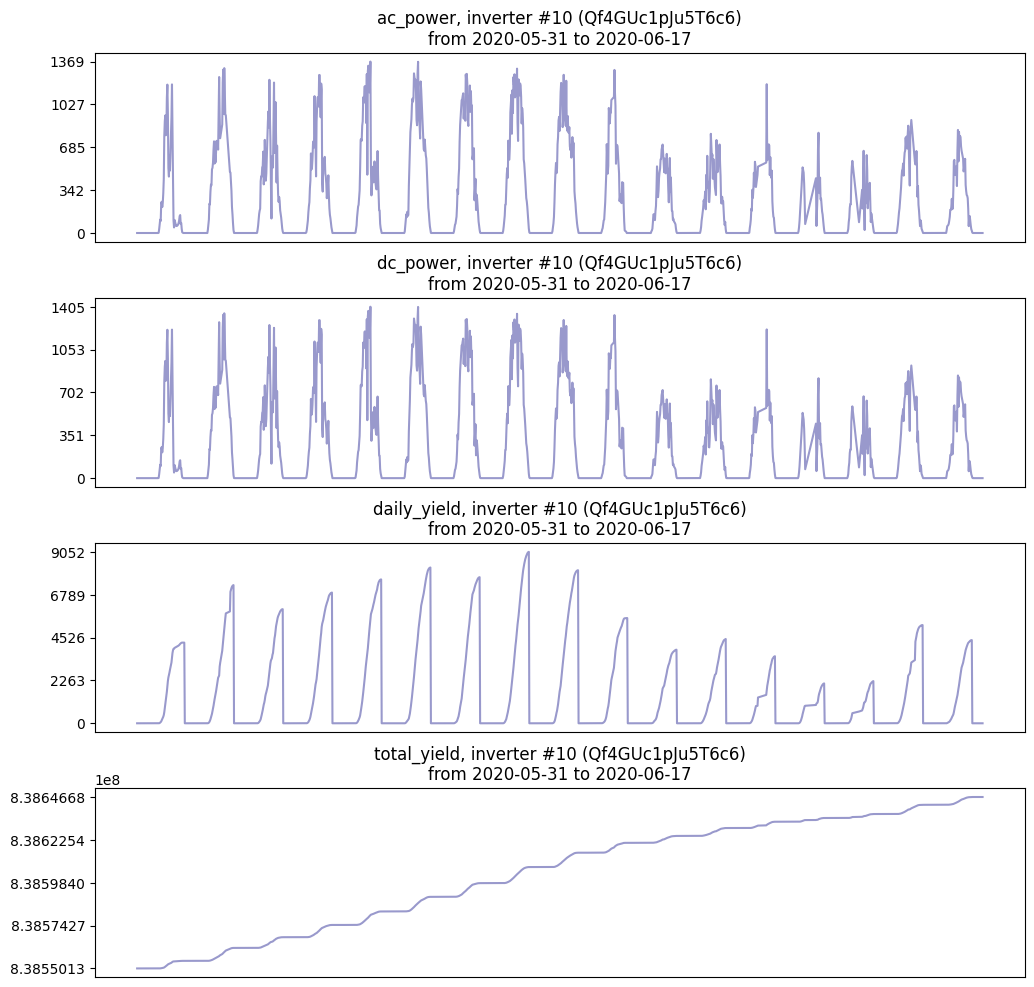

In [54]:
_ = plot_inverter(prod_p2,prod_p2_supp_data,10,start=1500)

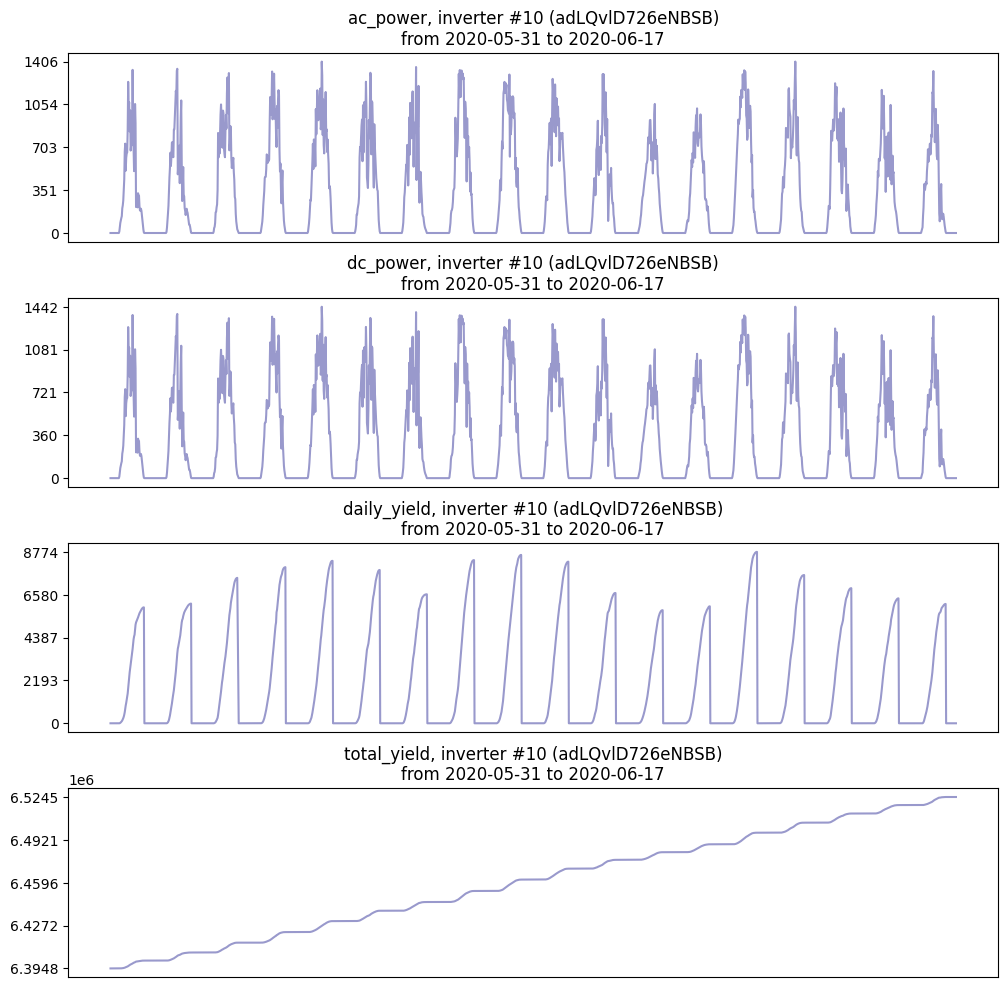

In [55]:
_ = plot_inverter(prod_p1,prod_p1_supp_data,10,start=1500)

In [56]:
prod_p2_missing_data = find_missing(prod_p2)
missing_summary(prod_p2, prod_p2_missing_data)

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

Total expected datetimes : 3264
Total present datetimes  : 3211

Total dt with missing entries or absent: 1505 (46.11%)

Absent dt (all inverters are missing)  :   53 (1.62%)
Present dt with some inverters missing : 1452 (44.49%)

All dt. with missing inv. in day time  : 1122 (34.38%)
All dt. with missing inv. in the night :  383 (11.73%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

In [57]:
prod_p1_missing_data = find_missing(prod_p1)
missing_summary(prod_p1, prod_p1_missing_data)

Total expected datetimes : 3264
Total present datetimes  : 3231

Total dt with missing entries or absent:  115 (3.52%)

Absent dt (all inverters are missing)  :   33 (1.01%)
Present dt with some inverters missing :   82 (2.51%)

All dt. with missing inv. in day time  :   87 (2.67%)
All dt. with missing inv. in the night :   28 (0.86%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

In [58]:
prod_p2 = fill_night_missing(prod_p2, prod_p2_missing_data)
prod_p2_missing_data = find_missing(prod_p2)
missing_summary(prod_p2, prod_p2_missing_data)

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

Total expected datetimes : 3264
Total present datetimes  : 3211

Total dt with missing entries or absent: 1122 (34.38%)

Absent dt (all inverters are missing)  :   53 (1.62%)
Present dt with some inverters missing : 1069 (32.75%)

All dt. with missing inv. in day time  : 1122 (34.38%)
All dt. with missing inv. in the night :    0 (0.00%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({'date_time':dt,
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\1899743223.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_data = missing_data.append({

In [59]:
prod_p1 = fill_night_missing(prod_p1, prod_p1_missing_data)
prod_p1_missing_data = find_missing(prod_p1)
missing_summary(prod_p1, prod_p1_missing_data)

Total expected datetimes : 3264
Total present datetimes  : 3231

Total dt with missing entries or absent:   87 (2.67%)

Absent dt (all inverters are missing)  :   33 (1.01%)
Present dt with some inverters missing :   54 (1.65%)

All dt. with missing inv. in day time  :   87 (2.67%)
All dt. with missing inv. in the night :    0 (0.00%)


C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_entries = new_entries.append(intermediate_df,ignore_index=True )
C:\Users\dell\AppData\Local\Temp\ipykernel_21352\3337242103.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

**Key Differences for Plant 1**

**Reduction in Total Missing Entries:**

The total missing entries decreased from 115 (3.52%) to 87 (2.67%). This shows an improvement after the cleaning process.

**Night-Time Missing Entries:**

Initially, there were 28 (0.86%) missing entries during the night.
After cleaning, night-time missing entries were reduced to 0 (0.00%), indicating that all night-time data has been filled.

**Day-Time Missing Entries:**

The number of missing entries during the day remained the same at 87 (2.67%).

**Entries with Some Inverters Missing:**

The number of entries with some inverters missing decreased from 82 (2.51%) to 54 (1.65%).

**Key Differences for Plant 2**

**Reduction in Total Missing Entries:**

The total missing entries decreased from 1505 (46.11%) to 1122 (34.38%). This shows a significant improvement after the cleaning process.

**Night-Time Missing Entries:**

Initially, there were 383 (11.73%) missing entries during the night.
After cleaning, night-time missing entries were reduced to 0 (0.00%), indicating that all night-time data has been filled.

**Day-Time Missing Entries:**

The number of missing entries during the day remained the same at 1122 (34.38%).

**Entries with Some Inverters Missing:**

The number of entries with some inverters missing decreased from 1452 (44.49%) to 1069 (32.75%).

# Data Exploration preparation and insights

### Plant 2 Weather sensor Data

In [60]:
p2ws = pd.read_csv("F:\\UNI courses\\semester 2 year 3\\optimization techniques\\project\\Plant_2_Weather_Sensor_Data.csv")
p2ws.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

In [61]:

p2ws, p2ws_supp_data = optimize_formats_ws(p2ws)

Initial size: 0.59 Mb
Final size:    0.10 Mb
Memory footprint reduction: 82.16%


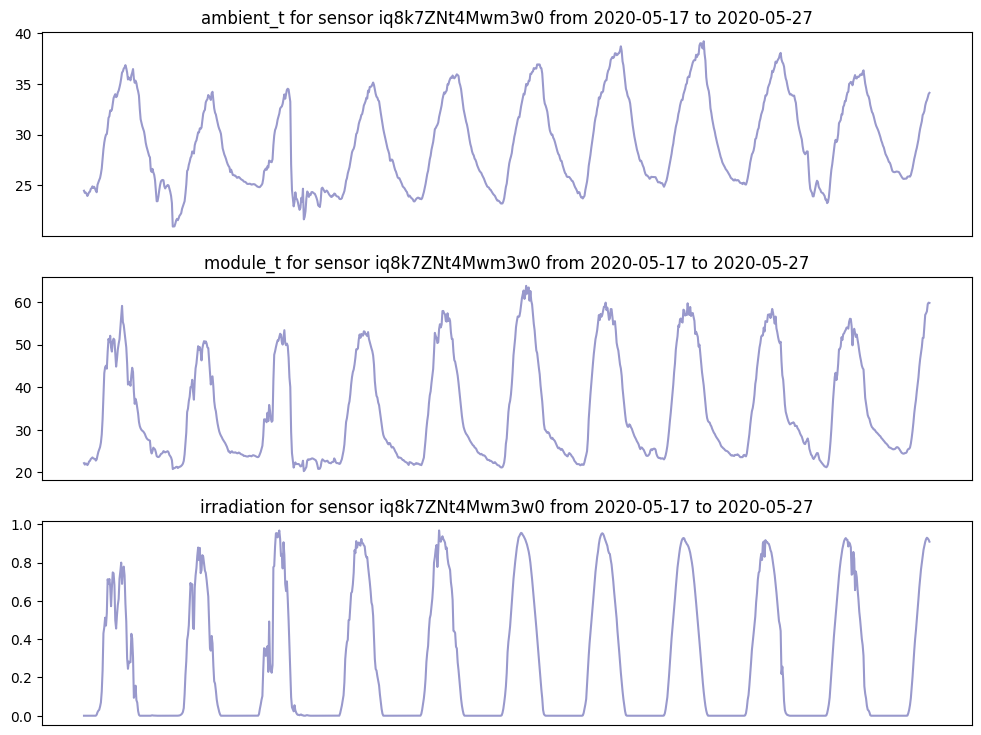

In [62]:
_ = plot_sensor(p2ws,p2ws_supp_data, start=200,end=1200)

In [63]:
def power_vs_irr_vs_temp(sensor_df, prod_df, key):
    key_df = pd.merge(left=sensor_df, right=prod_df, how='inner', on='date_time')
    key_df = key_df[key_df['source_key'] == key]
    date_time = pd.DatetimeIndex(key_df['date_time'].values)
    date_time = date_time.hour + date_time.minute / 60
    day_ix = (date_time >= 6) & (date_time <= 18.5)
    key_df = key_df[day_ix]
    key_df.drop(columns=key_df.columns.difference(['date_time', 'ambient_t',
                    'module_t', 'irradiation', 'ac_power']), inplace=True)
    key_df = key_df.sort_values(by=['irradiation'])
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # First 2D Scatter Plot: AC Power Vs Ambient Temperature
    color_index = key_df['irradiation'].values / (1.1 * key_df['irradiation'].max()) + 0.1
    colors = plt.cm.Greens(color_index)[-1::-1]
    scatter1 = axs[0].scatter(key_df['ambient_t'], key_df['ac_power'], color=colors, alpha=1)
    axs[0].set_title("AC Power Vs Ambient Temperature Plant #1")
    axs[0].set_xlabel("Ambient Temperature (ºC)")
    axs[0].set_ylabel("AC Power (Kw)", labelpad=30)
    axs[0].yaxis.get_label().set_rotation(-90)
    plt.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=0.0, vmax=1.2), cmap='Greens_r'), 
                 ax=axs[0], ticks=np.arange(0, 1.21, 0.2), label='Irradiation (W / $m^2$)')

    # Second 2D Scatter Plot: AC Power Vs Irradiation
    scatter2 = axs[1].scatter(key_df['ambient_t'], key_df['irradiation'], color=colors, alpha=1)
    axs[1].set_title('AC Power Vs Ambient Temperature & Irradiation Plant #1 inv #1')
    axs[1].set_xlabel('Ambient Temperature (ºC)')
    axs[1].set_ylabel('Irradiation (W / $m^2$)')
    plt.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=0.0, vmax=1.2), cmap='Greens_r'), 
                 ax=axs[1], ticks=np.arange(0, 1.21, 0.2), label='Irradiation (W / $m^2$)')

    plt.show()



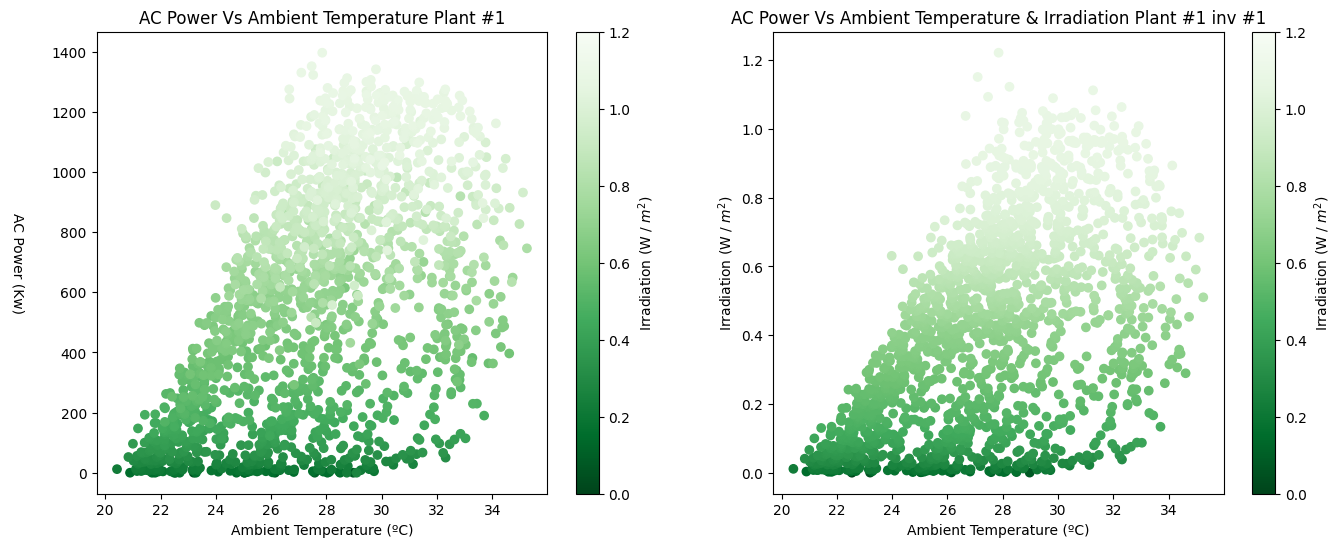

In [64]:
power_vs_irr_vs_temp(p1ws,prod_p1,21)

A clear positive relation between Irradiance and ac_power can be
   observed

**Steps and New Features**

**Filter Data by Source Key:**

The function first filters the production dataframe (prod_df) to include only the data corresponding to the specified source_key.

**Merge Dataframes:**

It merges the filtered production dataframe with the sensor dataframe (sensor_df) on the date_time column to combine both datasets.

**Filter Data by Time:**

The function converts the date_time values to hours and filters the data to include only the entries between 6 AM and 6:30 PM (18.5 hours), corresponding to typical daylight hours.

**Rename Columns:**

The **irradiation** column is renamed to **Gir**.
The **ac_power** column is renamed to **pac**.
The **ambient_t** column is renamed to **Ta**.


**Create Time Feature:**

**It adds a new column hours representing the fractional hours of the day.**

**Generate New Features:**

Gir^3: Cubic of Gir.

Gir^2: Square of Gir.

Ta^2: Square of Ta.

Gir^2.Ta: Product of Gir^2 and Ta.

Gir.Ta^2: Product of Gir and Ta^2.

Gir.Ta: Product of Gir and Ta.


Gir^3: Represents the cubic effect of irradiation.

Gir^2: Represents the quadratic effect of irradiation.

Ta^2: Represents the quadratic effect of ambient temperature.

Gir^2.Ta: Interaction term that captures the combined quadratic effect of irradiation and linear effect of ambient temperature.

Gir.Ta^2: Interaction term that captures the combined linear effect of irradiation and quadratic effect of ambient temperature.

Gir.Ta: Interaction term that captures the combined linear effects of irradiation and ambient temperature.

In [65]:
def create_new_features(prod_df,sensor_df,key_n):
    df = prod_df.copy()[prod_df['source_key']==key_n]
    df = pd.merge(left=sensor_df,right=df,how='inner',on='date_time')
    hours = pd.DatetimeIndex(df['date_time'].values)
    hours = hours.hour + hours.minute/60
    df = df[(hours >= 6) & (hours <= 18.5)]
    df.rename(columns={'irradiation':'Gir','ac_power':'pac', 
                       'ambient_t': 'Ta'}, inplace=True)
    df = df[['date_time','source_key','Gir','Ta','pac']]
    df['hours'] = hours[(hours >= 6) & (hours <= 18.5)]
    df['Gir^3'] = np.power(df['Gir'],3)
    df['Gir^2'] = np.power(df['Gir'],2)
    df['Ta^2']  = np.power(df['Ta'],2)
    df['Gir^2.Ta'] = np.multiply(df['Gir^2'],df['Ta'])
    df['Gir.Ta^2'] = np.multiply(df['Gir'],df['Ta^2'])
    df['Gir.Ta'] =  np.multiply(df['Gir'],df['Ta'])
    df = df[['date_time','hours','Gir^3','Gir^2','Gir^2.Ta','Gir.Ta^2',
                     'Gir.Ta','Gir','pac']]
                     
    return df

In [66]:
prod_p1_new_data = create_new_features(prod_p1,p1ws,1)
prod_p1_new_data.head()

date_time  hours         Gir^3     Gir^2  Gir^2.Ta   Gir.Ta^2  \
24 2020-05-15 06:00:00   6.00  2.040199e-07  0.000035  0.000835   3.415926   
25 2020-05-15 06:15:00   6.25  1.106215e-05  0.000496  0.011921  12.846653   
26 2020-05-15 06:30:00   6.50  1.206250e-04  0.002441  0.058535  28.404842   
27 2020-05-15 06:45:00   6.75  8.680992e-04  0.009100  0.220395  55.954521   
28 2020-05-15 07:00:00   7.00  2.859687e-03  0.020147  0.494357  85.460059   

      Gir.Ta       Gir         pac  
24  0.141808  0.005887    5.162500  
25  0.535018  0.022282   30.014286  
26  1.184684  0.049410   69.200000  
27  2.310357  0.095394  130.142857  
28  3.482849  0.141940  195.100000

# PSO with ANN

### Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from pyswarm import pso
import multiprocessing

In [68]:
def split_data(df):
    X = df.drop(columns=['hours', 'pac'])
    pac = df['pac'].values
    train_size = int(0.8 * len(pac))
    X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
    pac_train, pac_test = pac[:train_size], pac[train_size:]
    ix = pac_test > 0
    pac_test = pac_test[ix]
    X_test = X_test[ix]
    return X_train, X_test, pac_train, pac_test

X_train, X_test, pac_train, pac_test = split_data(prod_p1_new_data)


In [69]:
def create_ann(input_dim, neurons=[64, 32], dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [70]:
def pso_objective(params, X_train, y_train):
    neurons_layer1 = int(params[0])
    neurons_layer2 = int(params[1])
    dropout_rate = params[2]
    model = create_ann(X_train.shape[1], [neurons_layer1, neurons_layer2], dropout_rate)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    return mse



In [71]:
def optimize_ann_with_pso(X_train, y_train):
    lb = [10, 10, 0.1]  # lower bounds for layer 1 neurons, layer 2 neurons, dropout rate
    ub = [100, 100, 0.5] # upper bounds for layer 1 neurons, layer 2 neurons, dropout rate
    opt_params, _ = pso(pso_objective, lb, ub, args=(X_train, y_train), swarmsize=10, maxiter=10)
    return [int(opt_params[0]), int(opt_params[1]), opt_params[2]]


In [72]:
def get_final_model(X_train, X_test, y_train, y_test):
    neurons = optimize_ann_with_pso(X_train, y_train)
    model = create_ann(X_train.shape[1], neurons[:2], neurons[2])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return model, y_pred, mse


In [73]:
total_keys = len(np.unique(prod_p1['source_key'].values))
print(f"Total number of unique source keys: {total_keys}")


Total number of unique source keys: 22


In [86]:
def construct_models(prod_df, sensor_df):
    models = []
    predictions_df = pd.DataFrame({})
    rmse = []
    
    for key in np.unique(prod_df['source_key'].values):
        new_features = create_new_features(prod_df, sensor_df, key)
        X_train, X_test, pac_train, pac_test = split_data(new_features)
        date_time = X_test['date_time'].values
        X_train = X_train.drop(columns=['date_time']).values
        X_test = X_test.drop(columns=['date_time']).values
        model, pac_predicted, mse = get_final_model(X_train, X_test, pac_train, pac_test)
        models.append(model)
        rmse.append(np.sqrt(mse))
        r2score = int(100 * r2_score(pac_test, pac_predicted))
        residuals = (pac_predicted - pac_test)
        str1 = f'#{str(key).rjust(2)}   --->   '
        str2 = f' rmse: {int(np.sqrt(mse))}'
        str3 = f',      R^2 (Determination coeff.): {r2score}%'
        print(str1 + str2 + str3)
        predictions_df = predictions_df.append(pd.DataFrame({
            'date_time': date_time, 'source_key': np.full(len(residuals), key),
            'pac': pac_test, 'pac_predicted': pac_predicted, 'residuals': residuals
        }))
    predictions_df.sort_values(by='date_time', ignore_index=True, inplace=True)
    return models, predictions_df, rmse

plant1_models, plant1_predictions, plant1_rmses = construct_models(prod_p1, p1ws)
plant1_predictions.head(3)





42/42 [==============================] - 0s 797us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
42/42 [==============================] - 0s 1ms/step - loss: 132624.4688
Epoch 2/50
42/42 [==============================] - 0s 1ms/step - loss: 27665.9844
Epoch 3/50
42/42 [==============================] - 0s 1ms/step - loss: 27590.5020
Epoch 4/50
42/42 [==============================] - 0s 1ms/step - loss: 25877.9238
Epoch 5/50
42/42 [==============================] - 0s 1ms/step - loss: 25335.0195
Epoch 6/50
42/42 [==============================] - 0s 1ms/step - loss: 26275.5039
Epoch 7/50
42/42 [==============================] - 0s 1ms/step - loss: 25048.2109
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: 25031.9141
Epoch 9/50
42/42 [==============================] - 0s 1ms/step - loss: 25002.8418
Epoch 10/50
42/42 [==============================] - 0s 2ms/step - loss: 23847.5957
Epoch 11/50
42/42 [==============================] - 0s 1ms

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 959us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 2ms/step - loss: 177499.9062
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 24798.8711
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 26572.6172
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 24051.0781
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 25109.7754
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 23520.5176
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 24435.0508
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 23487.5293
Epoch 9/50
43/43 [==============================] - 0s 992us/step - loss: 24535.8496
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 24636.4590
Epoch 11/50
43/43 [==============================] - 0s 1ms/

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 1ms/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 212629.0156
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 41142.0000
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 37013.5273
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 34363.8086
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 32652.0293
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 33441.9648
Epoch 7/50
43/43 [==============================] - 0s 2ms/step - loss: 29154.3789
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 32317.1953
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 32307.6465
Epoch 10/50
43/43 [==============================] - 0s 2ms/step - loss: 31878.8652
Epoch 11/50
43/43 [==============================] - 0s 2ms/step

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 674us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 139865.4375
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 22393.0996
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 23328.1660
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 23253.1094
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 22468.9355
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 23102.3379
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 22234.0332
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 23448.2871
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 20994.0332
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 22716.5332
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 778us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 133687.6094
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 23977.6973
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 22903.1758
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 23226.3750
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 23834.8906
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 22596.6992
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 21164.0156
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 22318.2637
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 21878.3867
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 22106.1797
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 794us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 212337.9531
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 42679.6328
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 39591.6094
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 35801.8047
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 33749.1172
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 35828.3789
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 33465.0195
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 34602.1172
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 32869.7695
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 30182.9062
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 1ms/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 206019.4844
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 28733.1328
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 25131.2324
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 25450.2793
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 26398.4844
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 24386.5566
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 23874.1777
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 24061.3750
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 25272.6445
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 25224.4785
Epoch 11/50
43/43 [==============================] - 0s 1ms/step

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 716us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 97069.5938
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 21273.1367
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 20286.3535
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 20604.9863
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 21113.7734
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 20159.1035
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 19838.2051
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 19643.9395
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 19018.5586
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 18454.9941
Epoch 11/50
43/43 [==============================] - 0s 1ms/ste

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 704us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 114152.4609
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 32562.0098
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 31973.5957
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 28744.9961
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 28639.9883
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 29666.7500
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 26666.6641
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 28087.6211
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 26711.7227
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 27019.4121
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 833us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 200778.6875
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 20757.5801
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 18534.3594
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 19264.6367
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 18874.5020
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 18888.9160
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 17651.8145
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 18544.2422
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 18254.5176
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 18299.3730
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 998us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 185618.0625
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 27881.3047
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 27102.2656
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 26208.9102
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 25767.5078
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 25709.4473
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 26316.3320
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 24478.2832
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 24858.2109
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 24606.8281
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


42/42 [==============================] - 0s 750us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
42/42 [==============================] - 1s 1ms/step - loss: 132365.3438
Epoch 2/50
42/42 [==============================] - 0s 1ms/step - loss: 19412.3594
Epoch 3/50
42/42 [==============================] - 0s 1ms/step - loss: 19952.5449
Epoch 4/50
42/42 [==============================] - 0s 1ms/step - loss: 18575.5723
Epoch 5/50
42/42 [==============================] - 0s 1ms/step - loss: 19876.6172
Epoch 6/50
42/42 [==============================] - 0s 1ms/step - loss: 18929.2207
Epoch 7/50
42/42 [==============================] - 0s 1ms/step - loss: 18429.4336
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: 19338.1680
Epoch 9/50
42/42 [==============================] - 0s 1ms/step - loss: 19000.4238
Epoch 10/50
42/42 [==============================] - 0s 2ms/step - loss: 19344.8340
Epoch 11/50
42/42 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 840us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 2ms/step - loss: 174715.6406
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 21456.7363
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 19827.7051
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 18850.6523
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 19057.8086
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 19230.1719
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 19184.5684
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 19143.9355
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 18481.5586
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 17633.1035
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 773us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 2ms/step - loss: 133381.0156
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 42801.8242
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 41269.6758
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 33724.3125
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 36761.3516
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 34549.3516
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 38132.6836
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 31789.8906
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 31812.4668
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 32370.5469
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 789us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 162271.4062
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 31326.8125
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 29597.5234
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 25516.1152
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 27090.4473
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 26963.7695
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 27109.3613
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 25886.6250
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 24142.0918
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 24643.6641
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 740us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 152913.0000
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 27118.7168
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 27015.2852
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 27463.9023
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 27990.0332
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 27689.7441
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 25868.1504
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 24172.7988
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 27066.1074
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 25413.9512
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 770us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 157869.1406
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 27328.6445
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 28137.7773
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 29168.9336
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 26684.1309
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 26525.7910
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 26384.4473
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 26431.8223
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 26787.2090
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 26157.9004
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 826us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 208547.1250
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 33731.5664
Epoch 3/50
43/43 [==============================] - 0s 976us/step - loss: 36054.0508
Epoch 4/50
43/43 [==============================] - 0s 976us/step - loss: 34595.1055
Epoch 5/50
43/43 [==============================] - 0s 960us/step - loss: 34649.7148
Epoch 6/50
43/43 [==============================] - 0s 953us/step - loss: 32373.7793
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 32621.8887
Epoch 8/50
43/43 [==============================] - 0s 986us/step - loss: 31569.1836
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 30705.1543
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 31051.9434
Epoch 11/50
43/43 [==============================] -

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 752us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 2ms/step - loss: 163862.7031
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 21791.5996
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 20700.1953
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 21065.3066
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 20403.2285
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 20633.0371
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 20787.6445
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 20527.5020
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 21543.7637
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 21041.7695
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 677us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 271235.8125
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 39632.5469
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 29322.1270
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 30710.8555
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 29015.2910
Epoch 6/50
43/43 [==============================] - 0s 952us/step - loss: 28161.4727
Epoch 7/50
43/43 [==============================] - 0s 954us/step - loss: 27355.2402
Epoch 8/50
43/43 [==============================] - 0s 944us/step - loss: 27411.5879
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 28632.7012
Epoch 10/50
43/43 [==============================] - 0s 976us/step - loss: 27944.5547
Epoch 11/50
43/43 [==============================] - 0

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 762us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 1s 1ms/step - loss: 170854.0000
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 23244.6523
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 20988.2383
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 21445.7734
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 22503.2891
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 22240.3691
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 20047.1230
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 20045.8184
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 21047.3828
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 21657.8926
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 786us/step
Stopping search: maximum iterations reached --> 10
Epoch 1/50
43/43 [==============================] - 0s 2ms/step - loss: 151018.7188
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 26963.3555
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 26567.0098
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 27123.4414
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 27291.3457
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 25084.8906
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 25165.9141
Epoch 8/50
43/43 [==============================] - 0s 2ms/step - loss: 26510.9902
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 24331.1426
Epoch 10/50
43/43 [==============================] - 0s 2ms/step - loss: 24355.5820
Epoch 11/50
43/43 [==============================] - 0s 1ms/st

C:\Users\dell\AppData\Local\Temp\ipykernel_14908\218574116.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


date_time  source_key         pac  pac_predicted  residuals
0 2020-06-11 07:30:00          11  132.350000     100.071251 -32.278749
1 2020-06-11 07:45:00           0  184.285714     127.985809 -56.299905
2 2020-06-11 07:45:00          11  182.757143     126.961708 -55.795435

**predict the AC power output (pac) of solar inverters using Artificial neural network model optimized with Particle Swarm Optimization (PSO)**


 0   --->    rmse: 135,      R^2 (Determination coeff.): 81%

 1   --->    rmse: 156,      R^2 (Determination coeff.): 80%

 2   --->    rmse: 150,      R^2 (Determination coeff.): 80%

 3   --->    rmse: 142,      R^2 (Determination coeff.): 82%

 4   --->    rmse: 118,      R^2 (Determination coeff.): 88%

 5   --->    rmse: 142,      R^2 (Determination coeff.): 83%

 6   --->    rmse: 131,      R^2 (Determination coeff.): 84%

 7   --->    rmse: 115,      R^2 (Determination coeff.): 88%

 8   --->    rmse: 132,      R^2 (Determination coeff.): 85%

 9   --->    rmse: 131,      R^2 (Determination coeff.): 84%

10   --->    rmse: 132,      R^2 (Determination coeff.): 86%

11   --->    rmse: 119,      R^2 (Determination coeff.): 85%

12   --->    rmse: 181,      R^2 (Determination coeff.): 72%

13   --->    rmse: 144,      R^2 (Determination coeff.): 81%

14   --->    rmse: 128,      R^2 (Determination coeff.): 85%

15   --->    rmse: 126,      R^2 (Determination coeff.): 86%

16   --->    rmse: 146,      R^2 (Determination coeff.): 81%

17   --->    rmse: 132,      R^2 (Determination coeff.): 84%

18   --->    rmse: 135,      R^2 (Determination coeff.): 84%

19   --->    rmse: 164,      R^2 (Determination coeff.): 76%

20   --->    rmse: 145,      R^2 (Determination coeff.): 82%

21   --->    rmse: 127,      R^2 (Determination coeff.): 85%


**RMSE (Root Mean Squared Error): The RMSE values range from 115 to 181, indicating the model's average error in predicting the AC power output.**

**R-squared (Coefficient of Determination): The R-squared values range from 72% to 88%, indicating the proportion of variance in the dependent variable (AC power output) that is predictable from the independent variables.**

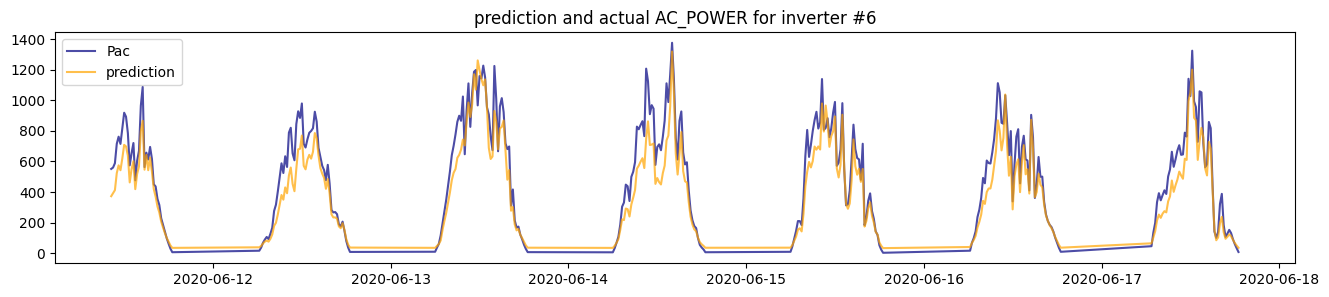

In [87]:
def plot_sample(predictions_df, key):
    key_df = predictions_df[predictions_df['source_key'] == key]
    plt.figure(figsize=(16, 3))
    plt.plot(key_df['date_time'], key_df['pac'], label='Pac', alpha=0.7)
    plt.plot(key_df['date_time'], key_df['pac_predicted'], alpha=0.7, label="prediction")
    plt.legend(loc='best')
    plt.title(f"prediction and actual AC_POWER for inverter #{key}")
    plt.show()

plot_sample(plant1_predictions, 6)


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_total_yields(prod_df, prediction_df, key):
    """
    Calculate instant energy, daily yield, and total yield from predicted AC power and plot the results.
    
    Parameters:
    - prod_df: DataFrame, the actual production data.
    - prediction_df: DataFrame, the predicted AC power data.
    - key: int, the specific source key to process.
    """
    # Convert date_time columns to datetime64[ns] type
    prod_df['date_time'] = pd.to_datetime(prod_df['date_time'])
    prediction_df['date_time'] = pd.to_datetime(prediction_df['date_time'])
    
    plt.figure(figsize=(12, 6))
    
    prod_df = prod_df[prod_df['source_key'] == key]
    prediction_df = prediction_df[prediction_df['source_key'] == key]
    merged_df = pd.merge(prod_df, prediction_df, on=['date_time'], how='inner')
    
    pac = merged_df['pac_predicted'].values
    date_time = pd.DatetimeIndex(merged_df['date_time'])
    time_delta = np.hstack([[0.25], (date_time[1:] - date_time[:-1]).seconds / 3600])
    
    instant_energy = (pac[:-1] + pac[1:]) / 2 * time_delta[1:]
    daily_yield = np.zeros_like(pac)
    
    for i in range(len(date_time) - 1):
        if 6 <= date_time[i].hour <= 18 and date_time[i + 1].hour <= 18.5:
            daily_yield[i + 1] = instant_energy[i]

    total_yield_pred = np.cumsum(daily_yield)
    
    plt.plot(date_time, total_yield_pred, label='predicted total_yield', color='blue')
    
    prod_df = prod_df[prod_df['date_time'] >= date_time[0]]
    total_yield_actual = prod_df['total_yield'].values
    total_yield_actual = total_yield_actual - total_yield_actual.min()
    plt.plot(prod_df['date_time'].values, total_yield_actual, label='Dataset total_yield', color='orange')
    
    daily_yield_actual = prod_df['daily_yield'].values
    energy = np.hstack([[0], daily_yield_actual[1:] - daily_yield_actual[:-1]])
    
    date_time_actual = prod_df['date_time'].values
    date_time_actual = date_time_actual[energy >= 0]
    energy = energy[energy >= 0]
    
    total_yield_from_dy = np.cumsum(energy)
    plt.plot(date_time_actual[:-10], total_yield_from_dy[:-10], label='calculated total_yield from daily_yield', color='black')
    
    plt.legend()
    plt.show()




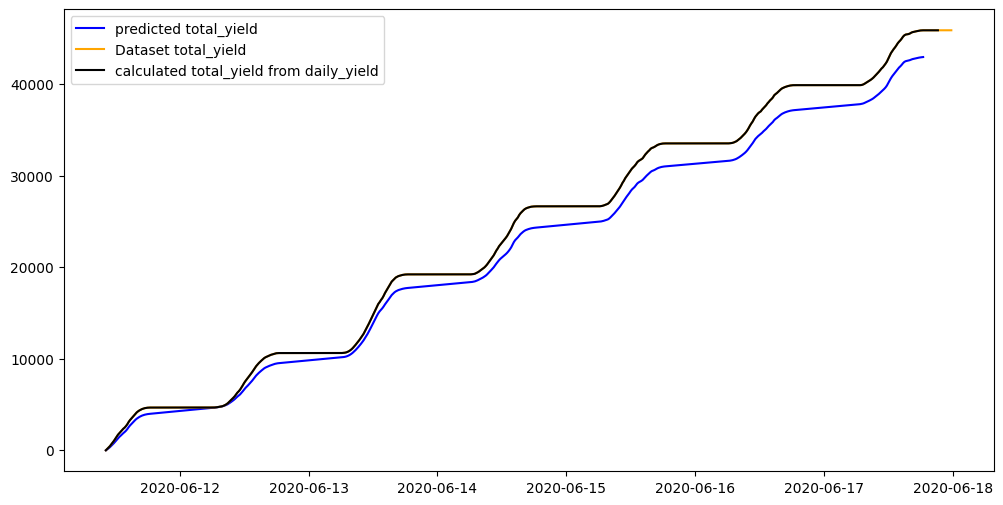

In [89]:
get_total_yields(prod_p1, plant1_predictions,4)


## WIPSO with ANN

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN creation function
def create_ann(input_dim, neurons=[64, 32], dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=input_dim, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the objective function for PSO
def pso_objective(params, X_train, y_train):
    neurons_layer1 = int(params[0])
    neurons_layer2 = int(params[1])
    dropout_rate = params[2]
    model = create_ann(X_train.shape[1], [neurons_layer1, neurons_layer2], dropout_rate)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    return mse

# WIPSO implementation
def wipso(X_train, y_train, lb, ub, swarmsize=10, maxiter=10, W_min=0.4, W_max=0.9):
    dim = len(lb)
    lb = np.array(lb)
    ub = np.array(ub)
    # Initialize particles
    particles = np.random.rand(swarmsize, dim) * (ub - lb) + lb
    velocities = np.random.rand(swarmsize, dim)
    personal_best_positions = particles.copy()
    personal_best_scores = np.array([pso_objective(p, X_train, y_train) for p in particles])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    global_best_score = np.min(personal_best_scores)

    C1, C2 = 2.0, 2.0  # Cognitive and social coefficients

    for t in range(maxiter):
        W_new = W_min + ((W_max - W_min) * (maxiter - t) / maxiter)  # Linearly decreasing inertia weight
        for i in range(swarmsize):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)
            velocities[i] = (W_new * velocities[i] +
                             C1 * r1 * (personal_best_positions[i] - particles[i]) +
                             C2 * r2 * (global_best_position - particles[i]))
            particles[i] += velocities[i]
            particles[i] = np.clip(particles[i], lb, ub)  # Ensure particles stay within bounds

            score = pso_objective(particles[i], X_train, y_train)
            if score < personal_best_scores[i]:
                personal_best_positions[i] = particles[i]
                personal_best_scores[i] = score
                if score < global_best_score:
                    global_best_position = particles[i]
                    global_best_score = score

    return global_best_position, global_best_score

# Function to optimize ANN with WIPSO
def optimize_ann_with_wipso(X_train, y_train):
    lb = [10, 10, 0.1]  # Lower bounds for layer 1 neurons, layer 2 neurons, dropout rate
    ub = [100, 100, 0.5] # Upper bounds for layer 1 neurons, layer 2 neurons, dropout rate
    opt_params, _ = wipso(X_train, y_train, lb, ub, swarmsize=10, maxiter=10)
    return [int(opt_params[0]), int(opt_params[1]), opt_params[2]]

# Train and evaluate the final model using optimized parameters
def get_final_model(X_train, X_test, y_train, y_test):
    neurons = optimize_ann_with_wipso(X_train, y_train)
    model = create_ann(X_train.shape[1], neurons[:2], neurons[2])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    y_pred = model.predict(X_test).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return model, y_pred, mse

# Function to construct models for all source keys
def construct_models(prod_df, sensor_df):
    models = []
    predictions_df = pd.DataFrame({})
    rmse = []
    
    for key in np.unique(prod_df['source_key'].values):
        new_features = create_new_features(prod_df, sensor_df, key)
        X_train, X_test, pac_train, pac_test = split_data(new_features)
        date_time = X_test['date_time'].values
        X_train = X_train.drop(columns=['date_time']).values
        X_test = X_test.drop(columns=['date_time']).values
        model, pac_predicted, mse = get_final_model(X_train, X_test, pac_train, pac_test)
        models.append(model)
        rmse.append(np.sqrt(mse))
        r2score = int(100 * r2_score(pac_test, pac_predicted))
        residuals = (pac_predicted - pac_test)
        str1 = f'#{str(key).rjust(2)}   --->   '
        str2 = f' rmse: {int(np.sqrt(mse))}'
        str3 = f',      R^2 (Determination coeff.): {r2score}%'
        print(str1 + str2 + str3)
        predictions_df = predictions_df.append(pd.DataFrame({
            'date_time': date_time, 'source_key': np.full(len(residuals), key),
            'pac': pac_test, 'pac_predicted': pac_predicted, 'residuals': residuals
        }))
    predictions_df.sort_values(by='date_time', ignore_index=True, inplace=True)
    return models, predictions_df, rmse


# Example usage
# Ensure to define and load your prod_p1 and p1ws DataFrames
plant1_models, plant1_predictions, plant1_rmses = construct_models(prod_p1, p1ws)
plant1_predictions.head(3)





42/42 [==============================] - 0s 676us/step
Epoch 1/50
42/42 [==============================] - 0s 1ms/step - loss: 102817.1250
Epoch 2/50
42/42 [==============================] - 0s 1ms/step - loss: 21799.8848
Epoch 3/50
42/42 [==============================] - 0s 1ms/step - loss: 21958.8730
Epoch 4/50
42/42 [==============================] - 0s 1ms/step - loss: 22013.7598
Epoch 5/50
42/42 [==============================] - 0s 1ms/step - loss: 22163.3281
Epoch 6/50
42/42 [==============================] - 0s 1ms/step - loss: 21881.8770
Epoch 7/50
42/42 [==============================] - 0s 1ms/step - loss: 21519.4785
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: 21408.6211
Epoch 9/50
42/42 [==============================] - 0s 1ms/step - loss: 21608.3320
Epoch 10/50
42/42 [==============================] - 0s 1ms/step - loss: 20361.4941
Epoch 11/50
42/42 [==============================] - 0s 1ms/step - loss: 21745.4434
Epoch 12/50
42/42 [=======

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 685us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 134261.6094
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 21755.6250
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 21658.2246
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 20588.5254
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 21716.0176
Epoch 6/50
43/43 [==============================] - 0s 900us/step - loss: 21658.3926
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 20014.2402
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 21098.9434
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 19823.1582
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 21154.3340
Epoch 11/50
43/43 [==============================] - 0s 991us/step - loss: 20164.6465
Epoch 12/50
43/43 [======

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 694us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 121573.6797
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 23924.7051
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 23386.8398
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 23413.6953
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 23744.3965
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 22580.2598
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 21927.8809
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 22705.3223
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 22957.5605
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 22488.6855
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 23494.9961
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 801us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 189457.0781
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 38280.5938
Epoch 3/50
43/43 [==============================] - 0s 992us/step - loss: 43206.4141
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 39221.3320
Epoch 5/50
43/43 [==============================] - 0s 932us/step - loss: 36165.2578
Epoch 6/50
43/43 [==============================] - 0s 991us/step - loss: 36062.9023
Epoch 7/50
43/43 [==============================] - 0s 992us/step - loss: 37504.1523
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 35166.9141
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 31459.7852
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 32989.9492
Epoch 11/50
43/43 [==============================] - 0s 972us/step - loss: 36469.8438
Epoch 12/50
43/43 [

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 718us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 197511.7656
Epoch 2/50
43/43 [==============================] - 0s 961us/step - loss: 34506.2578
Epoch 3/50
43/43 [==============================] - 0s 989us/step - loss: 32910.4766
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 32063.9609
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 30946.6973
Epoch 6/50
43/43 [==============================] - 0s 990us/step - loss: 30809.1602
Epoch 7/50
43/43 [==============================] - 0s 989us/step - loss: 29912.9238
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 30802.9941
Epoch 9/50
43/43 [==============================] - 0s 874us/step - loss: 30422.1875
Epoch 10/50
43/43 [==============================] - 0s 989us/step - loss: 29743.0820
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 30158.2734
Epoch 12/50
43/43

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 775us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 170893.0156
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 51617.5859
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 49310.8203
Epoch 4/50
43/43 [==============================] - 0s 992us/step - loss: 49021.7422
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 45470.1367
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 46199.9922
Epoch 7/50
43/43 [==============================] - 0s 992us/step - loss: 40411.9609
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 38508.6445
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 40222.3438
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 38608.1055
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 41046.8594
Epoch 12/50
43/43 [======

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 821us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 165061.1875
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 25787.5996
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 25402.4512
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 23358.9219
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 23470.0586
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 22512.7520
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 23560.8086
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 23263.4492
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 23467.5391
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 22274.8867
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 22887.8066
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 668us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 151385.8750
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 23197.5645
Epoch 3/50
43/43 [==============================] - 0s 988us/step - loss: 21565.2324
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 20616.2949
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 20605.5801
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 20465.3086
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 21593.1367
Epoch 8/50
43/43 [==============================] - 0s 997us/step - loss: 18208.8652
Epoch 9/50
43/43 [==============================] - 0s 990us/step - loss: 19798.4297
Epoch 10/50
43/43 [==============================] - 0s 980us/step - loss: 19228.7344
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 19613.0156
Epoch 12/50
43/43 [==

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 664us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 235423.4531
Epoch 2/50
43/43 [==============================] - 0s 996us/step - loss: 23408.7441
Epoch 3/50
43/43 [==============================] - 0s 999us/step - loss: 22008.1172
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 21755.2188
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 21055.5742
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 21069.8145
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 20776.0059
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 20720.1816
Epoch 9/50
43/43 [==============================] - 0s 992us/step - loss: 20558.2188
Epoch 10/50
43/43 [==============================] - 0s 995us/step - loss: 20679.8887
Epoch 11/50
43/43 [==============================] - 0s 943us/step - loss: 21046.0859
Epoch 12/50
43/43 [

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 1ms/step
Epoch 1/50
43/43 [==============================] - 0s 2ms/step - loss: 193016.0469
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 18195.7773
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 17815.8242
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 17876.1250
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 18157.9375
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 18439.3027
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 18172.2012
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 18214.3359
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 18178.0820
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 17608.6875
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 17489.2695
Epoch 12/50
43/43 [============

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 693us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 179190.0469
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 27520.9941
Epoch 3/50
43/43 [==============================] - 0s 986us/step - loss: 24252.3164
Epoch 4/50
43/43 [==============================] - 0s 990us/step - loss: 26773.0469
Epoch 5/50
43/43 [==============================] - 0s 995us/step - loss: 23580.9141
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 24560.8809
Epoch 7/50
43/43 [==============================] - 0s 993us/step - loss: 24260.8770
Epoch 8/50
43/43 [==============================] - 0s 985us/step - loss: 23166.2988
Epoch 9/50
43/43 [==============================] - 0s 991us/step - loss: 24997.9336
Epoch 10/50
43/43 [==============================] - 0s 993us/step - loss: 23468.1406
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 24399.1406
Epoch 12/50
43/

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


42/42 [==============================] - 0s 1ms/step
Epoch 1/50
42/42 [==============================] - 1s 1ms/step - loss: 86168.9922
Epoch 2/50
42/42 [==============================] - 0s 1ms/step - loss: 20102.8066
Epoch 3/50
42/42 [==============================] - 0s 1ms/step - loss: 19075.3301
Epoch 4/50
42/42 [==============================] - 0s 1ms/step - loss: 19494.0527
Epoch 5/50
42/42 [==============================] - 0s 1ms/step - loss: 17971.1191
Epoch 6/50
42/42 [==============================] - 0s 1ms/step - loss: 18097.2090
Epoch 7/50
42/42 [==============================] - 0s 1ms/step - loss: 19971.7949
Epoch 8/50
42/42 [==============================] - 0s 1ms/step - loss: 18774.6328
Epoch 9/50
42/42 [==============================] - 0s 1ms/step - loss: 18630.7930
Epoch 10/50
42/42 [==============================] - 0s 2ms/step - loss: 19289.1621
Epoch 11/50
42/42 [==============================] - 0s 1ms/step - loss: 20150.4844
Epoch 12/50
42/42 [=============

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 769us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 159755.0312
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 20895.2910
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 19026.5918
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 18845.6738
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 19605.9297
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 17518.3574
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 18376.7012
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 18377.1992
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 19146.9941
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 19194.0801
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 18272.4160
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 1ms/step
Epoch 1/50
43/43 [==============================] - 0s 2ms/step - loss: 175666.7500
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 22700.0020
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 21190.2402
Epoch 4/50
43/43 [==============================] - 0s 995us/step - loss: 20431.0820
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 19888.2266
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 20322.9824
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 21349.6211
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 20583.3574
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 20725.6875
Epoch 10/50
43/43 [==============================] - 0s 996us/step - loss: 19878.8457
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 19689.8574
Epoch 12/50
43/43 [========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 680us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 135846.1406
Epoch 2/50
43/43 [==============================] - 0s 924us/step - loss: 21046.8301
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 21993.4707
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 20774.7324
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 21747.5371
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 20807.8379
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 19943.8633
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 20206.6562
Epoch 9/50
43/43 [==============================] - 0s 928us/step - loss: 20424.0059
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 20697.7227
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 20194.6875
Epoch 12/50
43/43 [======

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 643us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 125863.7188
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 20625.5059
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 19840.1133
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 20994.8848
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 19861.1914
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 20423.3711
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 20217.9688
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 20238.3379
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 20819.3770
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 20072.2578
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 18826.6113
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 715us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 255440.7500
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 22732.6094
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 21438.9375
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 22360.2363
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 21435.8066
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 21496.6406
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 19147.0645
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 21850.7559
Epoch 9/50
43/43 [==============================] - 0s 1000us/step - loss: 19812.8281
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 20063.9902
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 19474.0391
Epoch 12/50
43/43 [=======

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 667us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 197821.3438
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 28890.6602
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 28815.7520
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 29381.7129
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 28240.1777
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 26770.6836
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 27785.2344
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 25214.0898
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 25733.2246
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 25476.5488
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 24880.4492
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 855us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 208464.0312
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 29041.6348
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 23747.5781
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 25717.4746
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 24245.0918
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 23400.1816
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 24849.0000
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 23288.0371
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 22996.1992
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 23212.6562
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 23262.8555
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 687us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 118141.6484
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 23791.7480
Epoch 3/50
43/43 [==============================] - 0s 1000us/step - loss: 21670.8184
Epoch 4/50
43/43 [==============================] - 0s 1000us/step - loss: 22659.1816
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 22685.9785
Epoch 6/50
43/43 [==============================] - 0s 1000us/step - loss: 22552.3516
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 21742.1328
Epoch 8/50
43/43 [==============================] - 0s 976us/step - loss: 21533.2832
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 21962.3438
Epoch 10/50
43/43 [==============================] - 0s 976us/step - loss: 21900.0898
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 22017.5156
Epoch 12/50
43/4

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 686us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 133314.2344
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 21224.5000
Epoch 3/50
43/43 [==============================] - 0s 1ms/step - loss: 20156.6758
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 19717.6387
Epoch 5/50
43/43 [==============================] - 0s 1ms/step - loss: 20080.6367
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 19711.0273
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 19341.0449
Epoch 8/50
43/43 [==============================] - 0s 1ms/step - loss: 19463.5352
Epoch 9/50
43/43 [==============================] - 0s 1ms/step - loss: 19919.9316
Epoch 10/50
43/43 [==============================] - 0s 1ms/step - loss: 18965.9199
Epoch 11/50
43/43 [==============================] - 0s 1ms/step - loss: 18496.1992
Epoch 12/50
43/43 [==========

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


43/43 [==============================] - 0s 666us/step
Epoch 1/50
43/43 [==============================] - 0s 1ms/step - loss: 182250.7812
Epoch 2/50
43/43 [==============================] - 0s 976us/step - loss: 26769.1602
Epoch 3/50
43/43 [==============================] - 0s 952us/step - loss: 26909.6309
Epoch 4/50
43/43 [==============================] - 0s 929us/step - loss: 25812.4023
Epoch 5/50
43/43 [==============================] - 0s 952us/step - loss: 24718.5391
Epoch 6/50
43/43 [==============================] - 0s 976us/step - loss: 26093.6777
Epoch 7/50
43/43 [==============================] - 0s 976us/step - loss: 24284.8691
Epoch 8/50
43/43 [==============================] - 0s 976us/step - loss: 23780.6035
Epoch 9/50
43/43 [==============================] - 0s 929us/step - loss: 24249.4941
Epoch 10/50
43/43 [==============================] - 0s 952us/step - loss: 24025.6465
Epoch 11/50
43/43 [==============================] - 0s 952us/step - loss: 23906.3320
Epoch 12/

C:\Users\dell\AppData\Local\Temp\ipykernel_21352\574120151.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append(pd.DataFrame({


date_time  source_key         pac  pac_predicted  residuals
0 2020-06-11 07:30:00          11  132.350000     100.664619 -31.685381
1 2020-06-11 07:45:00           0  184.285714     129.031708 -55.254007
2 2020-06-11 07:45:00          11  182.757143     128.131424 -54.625719

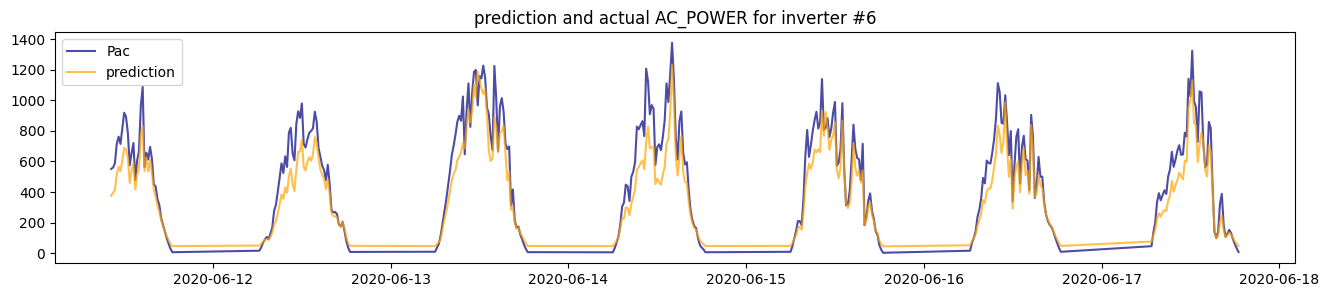

In [75]:
def plot_sample(predictions_df, key):
    key_df = predictions_df[predictions_df['source_key'] == key]
    plt.figure(figsize=(16, 3))
    plt.plot(key_df['date_time'], key_df['pac'], label='Pac', alpha=0.7)
    plt.plot(key_df['date_time'], key_df['pac_predicted'], alpha=0.7, label="prediction")
    plt.legend(loc='best')
    plt.title(f"prediction and actual AC_POWER for inverter #{key}")
    plt.show()

plot_sample(plant1_predictions, 6)

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_total_yields(prod_df, prediction_df, key):
    """
    Calculate instant energy, daily yield, and total yield from predicted AC power and plot the results.
    
    Parameters:
    - prod_df: DataFrame, the actual production data.
    - prediction_df: DataFrame, the predicted AC power data.
    - key: int, the specific source key to process.
    """
    # Convert date_time columns to datetime64[ns] type
    prod_df['date_time'] = pd.to_datetime(prod_df['date_time'])
    prediction_df['date_time'] = pd.to_datetime(prediction_df['date_time'])
    
    plt.figure(figsize=(12, 6))
    
    prod_df = prod_df[prod_df['source_key'] == key]
    prediction_df = prediction_df[prediction_df['source_key'] == key]
    merged_df = pd.merge(prod_df, prediction_df, on=['date_time'], how='inner')
    
    pac = merged_df['pac_predicted'].values
    date_time = pd.DatetimeIndex(merged_df['date_time'])
    time_delta = np.hstack([[0.25], (date_time[1:] - date_time[:-1]).seconds / 3600])
    
    instant_energy = (pac[:-1] + pac[1:]) / 2 * time_delta[1:]
    daily_yield = np.zeros_like(pac)
    
    for i in range(len(date_time) - 1):
        if 6 <= date_time[i].hour <= 18 and date_time[i + 1].hour <= 18.5:
            daily_yield[i + 1] = instant_energy[i]

    total_yield_pred = np.cumsum(daily_yield)
    
    plt.plot(date_time, total_yield_pred, label='predicted total_yield', color='blue')
    
    prod_df = prod_df[prod_df['date_time'] >= date_time[0]]
    total_yield_actual = prod_df['total_yield'].values
    total_yield_actual = total_yield_actual - total_yield_actual.min()
    plt.plot(prod_df['date_time'].values, total_yield_actual, label='Dataset total_yield', color='orange')
    
    daily_yield_actual = prod_df['daily_yield'].values
    energy = np.hstack([[0], daily_yield_actual[1:] - daily_yield_actual[:-1]])
    
    date_time_actual = prod_df['date_time'].values
    date_time_actual = date_time_actual[energy >= 0]
    energy = energy[energy >= 0]
    
    total_yield_from_dy = np.cumsum(energy)
    plt.plot(date_time_actual[:-10], total_yield_from_dy[:-10], label='calculated total_yield from daily_yield', color='black')
    
    plt.legend()
    plt.show()

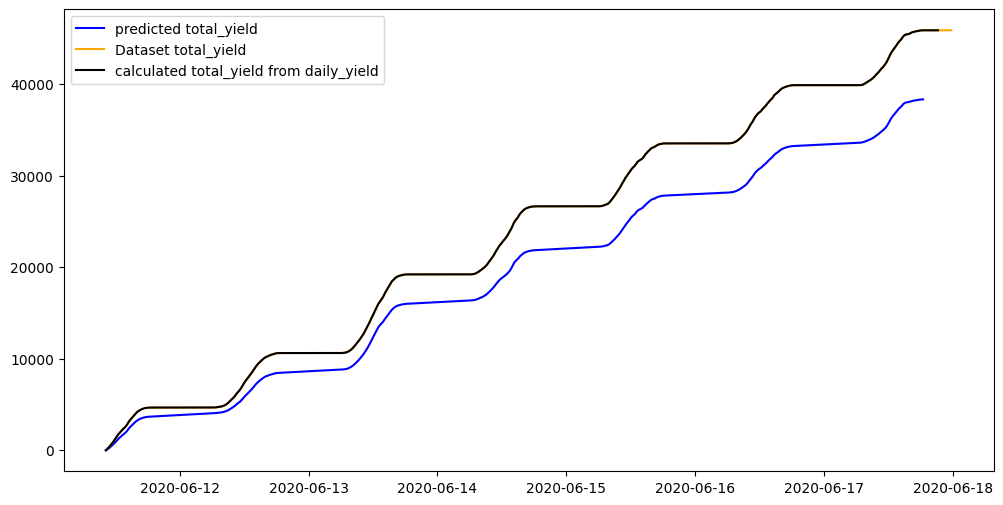

In [77]:
get_total_yields(prod_p1, plant1_predictions,4)